In [1]:
# Import the necessary libraries and load the files needed for EDA
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
import matplotlib.patches as mpatches
import warnings
warnings.filterwarnings("ignore")
import geopandas as gpd
from shapely.geometry import Point, Polygon
import fiona


## Quality Star Rating Analysis

### Quality Star Rating Measures (7)
* How often the home health team began their patients care in a timely manner
* How often patients got better at walking or moving around
* How often patients got better at getting in and out of bed
* How often patients got better at bathing
* How often patients breathing improved
* How often patients got better at taking their drugs correctly by mouth
* How often home health patients had to be admitted to the hospital


In [2]:
df = pd.read_csv('Resources/HH_Provider_Jan2023.csv')


In [3]:
# Set the below parameters so that all rows and columns would be visible
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)


In [4]:
# Calculate the number of rows and columns in the dataset
df.shape


(11609, 64)

In [5]:
df.head().style.set_properties(**{'text-align': 'right'})


,State,CMS Certification Number (CCN),Provider Name,Address,City,ZIP,Phone,Type of Ownership,Offers Nursing Care Services,Offers Physical Therapy Services,Offers Occupational Therapy Services,Offers Speech Pathology Services,Offers Medical Social Services,Offers Home Health Aide Services,Date Certified,Quality of patient care star rating,Footnote for quality of patient care star rating,How often the home health team began their patients care in a timely manner,Footnote for how often the home health team began their patients care in a timely manner,How often the home health team taught patients (or their family caregivers) about their drugs,Footnote for how often the home health team taught patients (or their family caregivers) about their drugs,How often the home health team determined whether patients received a flu shot for the current flu season,Footnote for how often the home health team determined whether patients received a flu shot for the current flu season,How often patients got better at walking or moving around,Footnote for how often patients got better at walking or moving around,How often patients got better at getting in and out of bed,Footnote for how often patients got better at getting in and out of bed,How often patients got better at bathing,Footnote for how often patients got better at bathing,How often patients breathing improved,Footnote for how often patients breathing improved,How often patients got better at taking their drugs correctly by mouth,Footnote for how often patients got better at taking their drugs correctly by mouth,How often home health patients had to be admitted to the hospital,Footnote for how often home health patients had to be admitted to the hospital,"How often patients receiving home health care needed urgent, unplanned care in the ER without being admitted","Footnote for how often patients receiving home health care needed urgent, unplanned care in the ER without being admitted",Changes in skin integrity post-acute care: pressure ulcer/injury,Footnote Changes in skin integrity post-acute care: pressure ulcer/injury,How often physician-recommended actions to address medication issues were completely timely,Footnote for how often physician-recommended actions to address medication issues were completely timely,Percent of Residents Experiencing One or More Falls with Major Injury,Footnote for Percent of Residents Experiencing One or More Falls with Major Injury,Application of Percent of Long Term Care Hospital Patients with an Admission and Discharge Functional Assessment and a Care Plan that Addresses Function,Footnote for Application of Percent of Long Term Care Hospital Patients with an Admission and Discharge Functional Assessment and a Care Plan that Addresses Function,DTC Numerator,DTC Denominator,DTC Observed Rate,DTC Risk-Standardized Rate,DTC Risk-Standardized Rate (Lower Limit),DTC Risk-Standardized Rate (Upper Limit),DTC Performance Categorization,Footnote for DTC Risk-Standardized Rate,PPR Numerator,PPR Denominator,PPR Observed Rate,PPR Risk-Standardized Rate,PPR Risk-Standardized Rate (Lower Limit),PPR Risk-Standardized Rate (Upper Limit),PPR Performance Categorization,Footnote for PPR Risk-Standardized Rate,"How much Medicare spends on an episode of care at this agency, compared to Medicare spending across all agencies nationally","Footnote for how much Medicare spends on an episode of care at this agency, compared to Medicare spending across all agencies nationally","No. of episodes to calc how much Medicare spends per episode of care at agency, compared to spending at all agencies (national)"
0,AK,27001,PROVIDENCE HOME HEALTH ALASKA,"4001 DALE STREET, SUITE 101",ANCHORAGE,99508,9075630130.000000,VOLUNTARY NON PROFIT - RELIGIOUS AFFILIATION,Yes,Yes,Yes,Yes,Yes,Yes,5/17/1982,4.500000,nan,91.200000,nan,99.700000,nan,44.300000,nan,89.000000,nan,90.800000,nan,89.900000,nan,96.500000,nan,95.400000,nan,14.900000,nan,14.200000,nan,0.400000,nan,90.000000,nan,1.700000,nan,99.30

In [6]:
df.tail().style.set_properties(**{'text-align': 'right'})


,State,CMS Certification Number (CCN),Provider Name,Address,City,ZIP,Phone,Type of Ownership,Offers Nursing Care Services,Offers Physical Therapy Services,Offers Occupational Therapy Services,Offers Speech Pathology Services,Offers Medical Social Services,Offers Home Health Aide Services,Date Certified,Quality of patient care star rating,Footnote for quality of patient care star rating,How often the home health team began their patients care in a timely manner,Footnote for how often the home health team began their patients care in a timely manner,How often the home health team taught patients (or their family caregivers) about their drugs,Footnote for how often the home health team taught patients (or their family caregivers) about their drugs,How often the home health team determined whether patients received a flu shot for the current flu season,Footnote for how often the home health team determined whether patients received a flu shot for the current flu season,How often patients got better at walking or moving around,Footnote for how often patients got better at walking or moving around,How often patients got better at getting in and out of bed,Footnote for how often patients got better at getting in and out of bed,How often patients got better at bathing,Footnote for how often patients got better at bathing,How often patients breathing improved,Footnote for how often patients breathing improved,How often patients got better at taking their drugs correctly by mouth,Footnote for how often patients got better at taking their drugs correctly by mouth,How often home health patients had to be admitted to the hospital,Footnote for how often home health patients had to be admitted to the hospital,"How often patients receiving home health care needed urgent, unplanned care in the ER without being admitted","Footnote for how often patients receiving home health care needed urgent, unplanned care in the ER without being admitted",Changes in skin integrity post-acute care: pressure ulcer/injury,Footnote Changes in skin integrity post-acute care: pressure ulcer/injury,How often physician-recommended actions to address medication issues were completely timely,Footnote for how often physician-recommended actions to address medication issues were completely timely,Percent of Residents Experiencing One or More Falls with Major Injury,Footnote for Percent of Residents Experiencing One or More Falls with Major Injury,Application of Percent of Long Term Care Hospital Patients with an Admission and Discharge Functional Assessment and a Care Plan that Addresses Function,Footnote for Application of Percent of Long Term Care Hospital Patients with an Admission and Discharge Functional Assessment and a Care Plan that Addresses Function,DTC Numerator,DTC Denominator,DTC Observed Rate,DTC Risk-Standardized Rate,DTC Risk-Standardized Rate (Lower Limit),DTC Risk-Standardized Rate (Upper Limit),DTC Performance Categorization,Footnote for DTC Risk-Standardized Rate,PPR Numerator,PPR Denominator,PPR Observed Rate,PPR Risk-Standardized Rate,PPR Risk-Standardized Rate (Lower Limit),PPR Risk-Standardized Rate (Upper Limit),PPR Performance Categorization,Footnote for PPR Risk-Standardized Rate,"How much Medicare spends on an episode of care at this agency, compared to Medicare spending across all agencies nationally","Footnote for how much Medicare spends on an episode of care at this agency, compared to Medicare spending across all agencies nationally","No. of episodes to calc how much Medicare spends per episode of care at agency, compared to spending at all agencies (national)"
11604,WY,537304,PREMIER HOME HEALTH INC,"487A NORTH MAIN, STE 2",THAYNE,83127,3078835500.000000,PROPRIETARY,Yes,Yes,Yes,Yes,No,Yes,9/14/2000,2.000000,nan,96.500000,nan,99.100000,nan,60.300000,nan,67.400000,nan,52.600000,nan,67.700000,nan,45.200000,nan,65.400000,nan,10.800000,nan,12.300000,nan,0.000000,nan,93.900000,nan,2.600000,nan,100.000000,nan,61.000000,77.000000,79.220000,74.

### Remove cells that will not be related to further analysis


In [7]:
columns_to_drop = ['Footnote for quality of patient care star rating',
                  'Footnote for how often the home health team began their patients care in a timely manner',
                  'Footnote for how often the home health team taught patients (or their family caregivers) about their drugs',
                  'Footnote for how often the home health team determined whether patients received a flu shot for the current flu season',
                  'Footnote for how often patients got better at walking or moving around',
                  'Footnote for how often patients got better at getting in and out of bed',
                  'Footnote for how often patients got better at bathing',
                  'Footnote for how often patients breathing improved',
                  'Footnote for how often patients got better at taking their drugs correctly by mouth',
                  'Footnote for how often home health patients had to be admitted to the hospital',
                  'Footnote for how often patients receiving home health care needed urgent, unplanned care in the ER without being admitted',
                  'Footnote Changes in skin integrity post-acute care: pressure ulcer/injury',
                  'Footnote for how often physician-recommended actions to address medication issues were completely timely',
                  'Footnote for Percent of Residents Experiencing One or More Falls with Major Injury',
                  'Footnote for Application of Percent of Long Term Care Hospital Patients with an Admission and Discharge Functional Assessment and a Care Plan that Addresses Function',
                  'Footnote for DTC Risk-Standardized Rate',
                  'Footnote for PPR Risk-Standardized Rate',
                  'Footnote for how much Medicare spends on an episode of care at this agency, compared to Medicare spending across all agencies nationally']

df.drop(columns = columns_to_drop, inplace = True)

In [8]:
df.shape


(11609, 46)

In [9]:
df.head().style.set_properties(**{'text-align': 'right'})


,State,CMS Certification Number (CCN),Provider Name,Address,City,ZIP,Phone,Type of Ownership,Offers Nursing Care Services,Offers Physical Therapy Services,Offers Occupational Therapy Services,Offers Speech Pathology Services,Offers Medical Social Services,Offers Home Health Aide Services,Date Certified,Quality of patient care star rating,How often the home health team began their patients care in a timely manner,How often the home health team taught patients (or their family caregivers) about their drugs,How often the home health team determined whether patients received a flu shot for the current flu season,How often patients got better at walking or moving around,How often patients got better at getting in and out of bed,How often patients got better at bathing,How often patients breathing improved,How often patients got better at taking their drugs correctly by mouth,How often home health patients had to be admitted to the hospital,"How often patients receiving home health care needed urgent, unplanned care in the ER without being admitted",Changes in skin integrity post-acute care: pressure ulcer/injury,How often physician-recommended actions to address medication issues were completely timely,Percent of Residents Experiencing One or More Falls with Major Injury,Application of Percent of Long Term Care Hospital Patients with an Admission and Discharge Functional Assessment and a Care Plan that Addresses Function,DTC Numerator,DTC Denominator,DTC Observed Rate,DTC Risk-Standardized Rate,DTC Risk-Standardized Rate (Lower Limit),DTC Risk-Standardized Rate (Upper Limit),DTC Performance Categorization,PPR Numerator,PPR Denominator,PPR Observed Rate,PPR Risk-Standardized Rate,PPR Risk-Standardized Rate (Lower Limit),PPR Risk-Standardized Rate (Upper Limit),PPR Performance Categorization,"How much Medicare spends on an episode of care at this agency, compared to Medicare spending across all agencies nationally","No. of episodes to calc how much Medicare spends per episode of care at agency, compared to spending at all agencies (national)"
0,AK,27001,PROVIDENCE HOME HEALTH ALASKA,"4001 DALE STREET, SUITE 101",ANCHORAGE,99508,9075630130.000000,VOLUNTARY NON PROFIT - RELIGIOUS AFFILIATION,Yes,Yes,Yes,Yes,Yes,Yes,5/17/1982,4.500000,91.200000,99.700000,44.300000,89.000000,90.800000,89.900000,96.500000,95.400000,14.900000,14.200000,0.400000,90.000000,1.700000,99.300000,253.000000,302.000000,83.770000,89.370000,84.850000,93.370000,Better Than National Rate,5.000000,337.000000,1.480000,2.920000,2.140000,4.010000,Same As National Rate,0.890000,500.000000
1,AK,27002,HOSPICE & HOME CARE OF JUNEAU,1803 GLACIER HIGHWAY,JUNEAU,99801,9074633113.000000,VOLUNTARY NON PROFIT - RELIGIOUS AFFILIATION,Yes,Yes,Yes,Yes,Yes,Yes,12/27/1982,2.000000,94.400000,81.800000,60.200000,55.300000,67.500000,57.900000,50.600000,62.500000,10.000000,16.100000,1.400000,96.000000,2.400000,100.000000,60.000000,86.000000,69.770000,73.140000,62.750000,81.720000,Same As National Rate,2.000000,76.000000,2.630000,3.370000,2.310000,4.820000,Same As National Rate,0.850000,220.000000
2,AK,27006,FAIRBANKS MEMORIAL HOSPITAL HHA,1701 GILLAM WAY,FAIRBANKS,99701,9074585410.000000,VOLUNTARY NON-PROFIT - OTHER,Yes,Yes,No,No,Yes,Yes,9/19/1985,2.000000,71.900000,98.400000,53.800000,68.700000,70.100000,64.400000,72.400000,58.700000,16.400000,25.200000,1.500000,96.100000,2.800000,98.000000,110.000000,129.000000,85.270000,87.590000,79.400000,92.770000,Better Than National Rate,1.000000,153.000000,0.650000,3.020000,2.120000,4.430000,Same As National Rate,0.740000,224.000000
3,AK,27008,ANCORA HOME HEALTH & HOSPICE,2851 E PALMER-WASILLA HWY,WASILLA,99654,9073524800.000000,PROPRIETARY,Yes,Yes,Yes,Yes,Yes,Yes,1/22/1987,4.000000,97.900000,99.800000,55.700000,84.700000,87.400000,89.200000,86.200000,88.800000,11.900000,12.600000,0.200000,99.700000,1.800000,100.000000,403.000000,518.000000,77.800000,86.770000,83.130000,90.280000,Better Than National Rate,15.000000,459.000000,3.270000,3.180000,2.280

In [10]:
df.tail().style.set_properties(**{'text-align': 'right'})


,State,CMS Certification Number (CCN),Provider Name,Address,City,ZIP,Phone,Type of Ownership,Offers Nursing Care Services,Offers Physical Therapy Services,Offers Occupational Therapy Services,Offers Speech Pathology Services,Offers Medical Social Services,Offers Home Health Aide Services,Date Certified,Quality of patient care star rating,How often the home health team began their patients care in a timely manner,How often the home health team taught patients (or their family caregivers) about their drugs,How often the home health team determined whether patients received a flu shot for the current flu season,How often patients got better at walking or moving around,How often patients got better at getting in and out of bed,How often patients got better at bathing,How often patients breathing improved,How often patients got better at taking their drugs correctly by mouth,How often home health patients had to be admitted to the hospital,"How often patients receiving home health care needed urgent, unplanned care in the ER without being admitted",Changes in skin integrity post-acute care: pressure ulcer/injury,How often physician-recommended actions to address medication issues were completely timely,Percent of Residents Experiencing One or More Falls with Major Injury,Application of Percent of Long Term Care Hospital Patients with an Admission and Discharge Functional Assessment and a Care Plan that Addresses Function,DTC Numerator,DTC Denominator,DTC Observed Rate,DTC Risk-Standardized Rate,DTC Risk-Standardized Rate (Lower Limit),DTC Risk-Standardized Rate (Upper Limit),DTC Performance Categorization,PPR Numerator,PPR Denominator,PPR Observed Rate,PPR Risk-Standardized Rate,PPR Risk-Standardized Rate (Lower Limit),PPR Risk-Standardized Rate (Upper Limit),PPR Performance Categorization,"How much Medicare spends on an episode of care at this agency, compared to Medicare spending across all agencies nationally","No. of episodes to calc how much Medicare spends per episode of care at agency, compared to spending at all agencies (national)"
11604,WY,537304,PREMIER HOME HEALTH INC,"487A NORTH MAIN, STE 2",THAYNE,83127,3078835500.000000,PROPRIETARY,Yes,Yes,Yes,Yes,No,Yes,9/14/2000,2.000000,96.500000,99.100000,60.300000,67.400000,52.600000,67.700000,45.200000,65.400000,10.800000,12.300000,0.000000,93.900000,2.600000,100.000000,61.000000,77.000000,79.220000,74.690000,66.100000,81.070000,Same As National Rate,3.000000,125.000000,2.400000,3.550000,2.480000,5.220000,Same As National Rate,1.130000,159.000000
11605,WY,537831,BEST HOME HEALTH & HOSPICE LLC,105 YELLOW CREEK ROAD,EVANSTON,82930,3077892899.000000,PROPRIETARY,Yes,Yes,Yes,Yes,Yes,Yes,12/16/2004,2.500000,99.200000,97.500000,55.500000,75.400000,77.800000,70.600000,60.000000,54.100000,11.600000,14.200000,0.000000,94.400000,4.200000,99.700000,102.000000,182.000000,56.040000,58.570000,50.890000,66.030000,Worse Than National Rate,1.000000,165.000000,0.610000,3.010000,2.010000,4.160000,Same As National Rate,0.900000,516.000000
11606,WY,537833,PREMIUM HEALTH AT HOME INC,1262 N 22ND ST,LARAMIE,82072,3077458710.000000,PROPRIETARY,Yes,Yes,No,No,No,Yes,7/14/2009,nan,33.300000,83.300000,nan,nan,nan,nan,nan,nan,nan,nan,nan,83.300000,0.000000,83.300000,14.000000,20.000000,70.000000,75.660000,56.730000,89.400000,Same As National Rate,0.000000,20.000000,0.000000,3.320000,2.350000,4.730000,Same As National Rate,0.870000,33.000000
11607,WY,537834,PREMIUM HEALTH AT HOME RAWLINS LLC,1904 EDINBURGH ST,RAWLINS,82301,3073249356.000000,PROPRIETARY,Yes,Yes,No,No,No,No,9/13/2011,nan,50.000000,87.500000,nan,nan,nan,nan,nan,nan,nan,nan,0.000000,90.000000,3.600000,100.000000,nan,13.000000,nan,nan,nan,nan,Not Available,nan,16.000000,nan,nan,nan,nan,Not Available,1.370000,28.000000
11608,WY,537835,ECLIPSE HOME HEALTH,"304 COFFEEN AVENUE, SUITE B",SHERIDAN,82801,nan,-,-,-,-,-,-,-,12/9/2021,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan


In [11]:
df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11609 entries, 0 to 11608
Data columns (total 46 columns):
 #   Column                                                                                                                                                    Non-Null Count  Dtype  
---  ------                                                                                                                                                    --------------  -----  
 0   State                                                                                                                                                     11609 non-null  object 
 1   CMS Certification Number (CCN)                                                                                                                            11609 non-null  int64  
 2   Provider Name                                                                                                                                             

In [12]:
df.describe().style.set_properties(**{'text-align': 'right'})


,CMS Certification Number (CCN),ZIP,Phone,Quality of patient care star rating,How often the home health team began their patients care in a timely manner,How often the home health team taught patients (or their family caregivers) about their drugs,How often the home health team determined whether patients received a flu shot for the current flu season,How often patients got better at walking or moving around,How often patients got better at getting in and out of bed,How often patients got better at bathing,How often patients breathing improved,How often patients got better at taking their drugs correctly by mouth,How often home health patients had to be admitted to the hospital,"How often patients receiving home health care needed urgent, unplanned care in the ER without being admitted",Changes in skin integrity post-acute care: pressure ulcer/injury,How often physician-recommended actions to address medication issues were completely timely,Percent of Residents Experiencing One or More Falls with Major Injury,Application of Percent of Long Term Care Hospital Patients with an Admission and Discharge Functional Assessment and a Care Plan that Addresses Function,DTC Numerator,DTC Denominator,DTC Observed Rate,DTC Risk-Standardized Rate,DTC Risk-Standardized Rate (Lower Limit),DTC Risk-Standardized Rate (Upper Limit),PPR Numerator,PPR Denominator,PPR Observed Rate,PPR Risk-Standardized Rate,PPR Risk-Standardized Rate (Lower Limit),PPR Risk-Standardized Rate (Upper Limit),"How much Medicare spends on an episode of care at this agency, compared to Medicare spending across all agencies nationally","No. of episodes to calc how much Medicare spends per episode of care at agency, compared to spending at all agencies (national)"
count,11609.000000,11609.000000,10948.000000,7786.000000,8419.000000,8399.000000,8075.000000,7846.000000,7816.000000,7869.000000,7674.000000,7739.000000,6861.000000,6861.000000,7915.000000,8423.000000,8407.000000,8423.000000,7248.000000,9249.000000,7248.000000,7248.000000,7248.000000,7248.000000,6290.000000,8983.000000,6290.000000,6290.000000,6290.000000,6290.000000,8393.000000,9414.000000
mean,342764.924800,60242.427599,6144805617.823529,3.249743,94.127771,96.900691,71.859356,77.846941,79.067694,80.683607,78.400404,74.704161,13.995817,11.383763,0.401693,91.848831,1.028845,97.691511,237.881898,244.428695,71.779083,76.794280,68.510509,83.876076,13.742448,285.587443,3.680211,3.421261,2.470162,4.721854,0.972535,485.166348
std,225151.461639,26919.107532,2452492476.566067,1.022742,8.995277,7.584678,18.511704,14.878897,14.947192,14.873205,17.943180,16.448971,3.991187,4.293047,0.764933,15.069560,1.211546,7.821118,462.119037,522.238890,16.053716,14.569428,16.930562,12.095530,30.081077,730.595302,2.595420,0.335000,0.305674,0.483990,0.138200,865.438835
min,17000.000000,612.000000,1956281040.000000,1.000000,20.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,3.680000,2.510000,5.410000,0.000000,1.000000,0.000000,2.320000,1.690000,3.010000,0.320000,1.000000
25%,147214.000000,36608.000000,3863274876.500000,2.500000,92.700000,97.200000,63.700000,71.700000,73.300000,75.300000,72.500000,66.100000,11.600000,8.700000,0.000000,92.300000,0.000000,98.600000,40.000000,25.000000,65.710000,71.287500,60.737500,79.380000,2.000000,14.000000,2.210000,3.230000,2.280000,4.440000,0.890000,72.000000
50%,347071.000000,67202.000000,6269156542.500000,3.500000,97.800000,99.200000,74.600000,81.100000,83.200000,84.300000,83.700000,77.900000,13.900000,11.300000,0.100000,97.200000,0.800000,99.800000,101.000000,88.000000,75.835000,81.110000,73.460000,87.050000,5.000000,71.000000,3.290000,3.390000,2.400000,4.750000,0.980000,226.000000
75%,537063.000000,83263.000000,8185883720.750000,4.000000,99.600000,99.900000,84.200000,87.600000,88.600000,90.300000,90.100000,86.100000,16.100000,13.900000,0.500000,99.100000,1.400000,100.000000,255.000000,254.000000,82.21

#### 11609 Medicare certified agencies
#### 7786 Medicare certified agencies with Quality Star Ratings


In [13]:
# Percentage of Medicare certified agencies with quality star ratings

percent_agencies_with_star_ratings = 7786/11609
print("Percentage of Medicare certified agencies with star ratings is {:.2f}%.".format(percent_agencies_with_star_ratings))


Percentage of Medicare certified agencies with star ratings is 0.67%.


In [14]:
df.dtypes


State                                                                                                                                                        object
CMS Certification Number (CCN)                                                                                                                                int64
Provider Name                                                                                                                                                object
Address                                                                                                                                                      object
City                                                                                                                                                         object
ZIP                                                                                                                                                           int64
Phone           

In [15]:
# Check if there are any missing values

df.isnull().sum()


State                                                                                                                                                          0
CMS Certification Number (CCN)                                                                                                                                 0
Provider Name                                                                                                                                                  0
Address                                                                                                                                                        0
City                                                                                                                                                           0
ZIP                                                                                                                                                            0
Phone                             

###  Create Star Rating DataFrame to look at the correlation of star rating measures to the overall star rating

In [16]:
# Create the star_rating_df DataFrame.
star_rating_df = df[['Quality of patient care star rating', 
                     'How often the home health team began their patients care in a timely manner',
                    'How often patients got better at walking or moving around',
                    'How often patients got better at getting in and out of bed',
                    'How often patients got better at bathing',
                    'How often patients breathing improved',
                    'How often patients got better at taking their drugs correctly by mouth',
                    'How often home health patients had to be admitted to the hospital']].copy()
star_rating_df.head().style.set_properties(**{'text-align': 'right'})

,Quality of patient care star rating,How often the home health team began their patients care in a timely manner,How often patients got better at walking or moving around,How often patients got better at getting in and out of bed,How often patients got better at bathing,How often patients breathing improved,How often patients got better at taking their drugs correctly by mouth,How often home health patients had to be admitted to the hospital
0,4.500000,91.200000,89.000000,90.800000,89.900000,96.500000,95.400000,14.900000
1,2.000000,94.400000,55.300000,67.500000,57.900000,50.600000,62.500000,10.000000
2,2.000000,71.900000,68.700000,70.100000,64.400000,72.400000,58.700000,16.400000
3,4.000000,97.900000,84.700000,87.400000,89.200000,86.200000,88.800000,11.900000
4,2.000000,89.900000,67.500000,79.400000,70.800000,72.100000,59.800000,20.900000


In [17]:
star_rating_corr = star_rating_df.corr()
star_rating_corr.style.set_properties(**{'text-align': 'right'})

,Quality of patient care star rating,How often the home health team began their patients care in a timely manner,How often patients got better at walking or moving around,How often patients got better at getting in and out of bed,How often patients got better at bathing,How often patients breathing improved,How often patients got better at taking their drugs correctly by mouth,How often home health patients had to be admitted to the hospital
Quality of patient care star rating,1.000000,0.433344,0.821845,0.756807,0.821046,0.751005,0.810462,-0.187728
How often the home health team began their patients care in a timely manner,0.433344,1.000000,0.302806,0.250379,0.307788,0.255505,0.293271,-0.002059
How often patients got better at walking or moving around,0.821845,0.302806,1.000000,0.808585,0.862053,0.729698,0.753123,-0.018372
How often patients got better at getting in and out of bed,0.756807,0.250379,0.808585,1.000000,0.784608,0.707212,0.701502,0.016229
How often patients got better at bathing,0.821046,0.307788,0.862053,0.784608,1.000000,0.761498,0.764294,-0.031767
How often patients breathing improved,0.751005,0.255505,0.729698,0.707212,0.761498,1.000000,0.681671,-0.004590
How often patients got better at taking their drugs correctly by mouth,0.810462,0.293271,0.753123,0.701502,0.764294,0.681671,1.000000,-0.005155
How often home health patients had to be admitted to the hospital,-0.187728,-0.002059,-0.018372,0.016229,-0.031767,-0.004590,-0.005155,1.000000


Text(0.5, 1.0, 'Correlation of Quality Star Rating Measures')

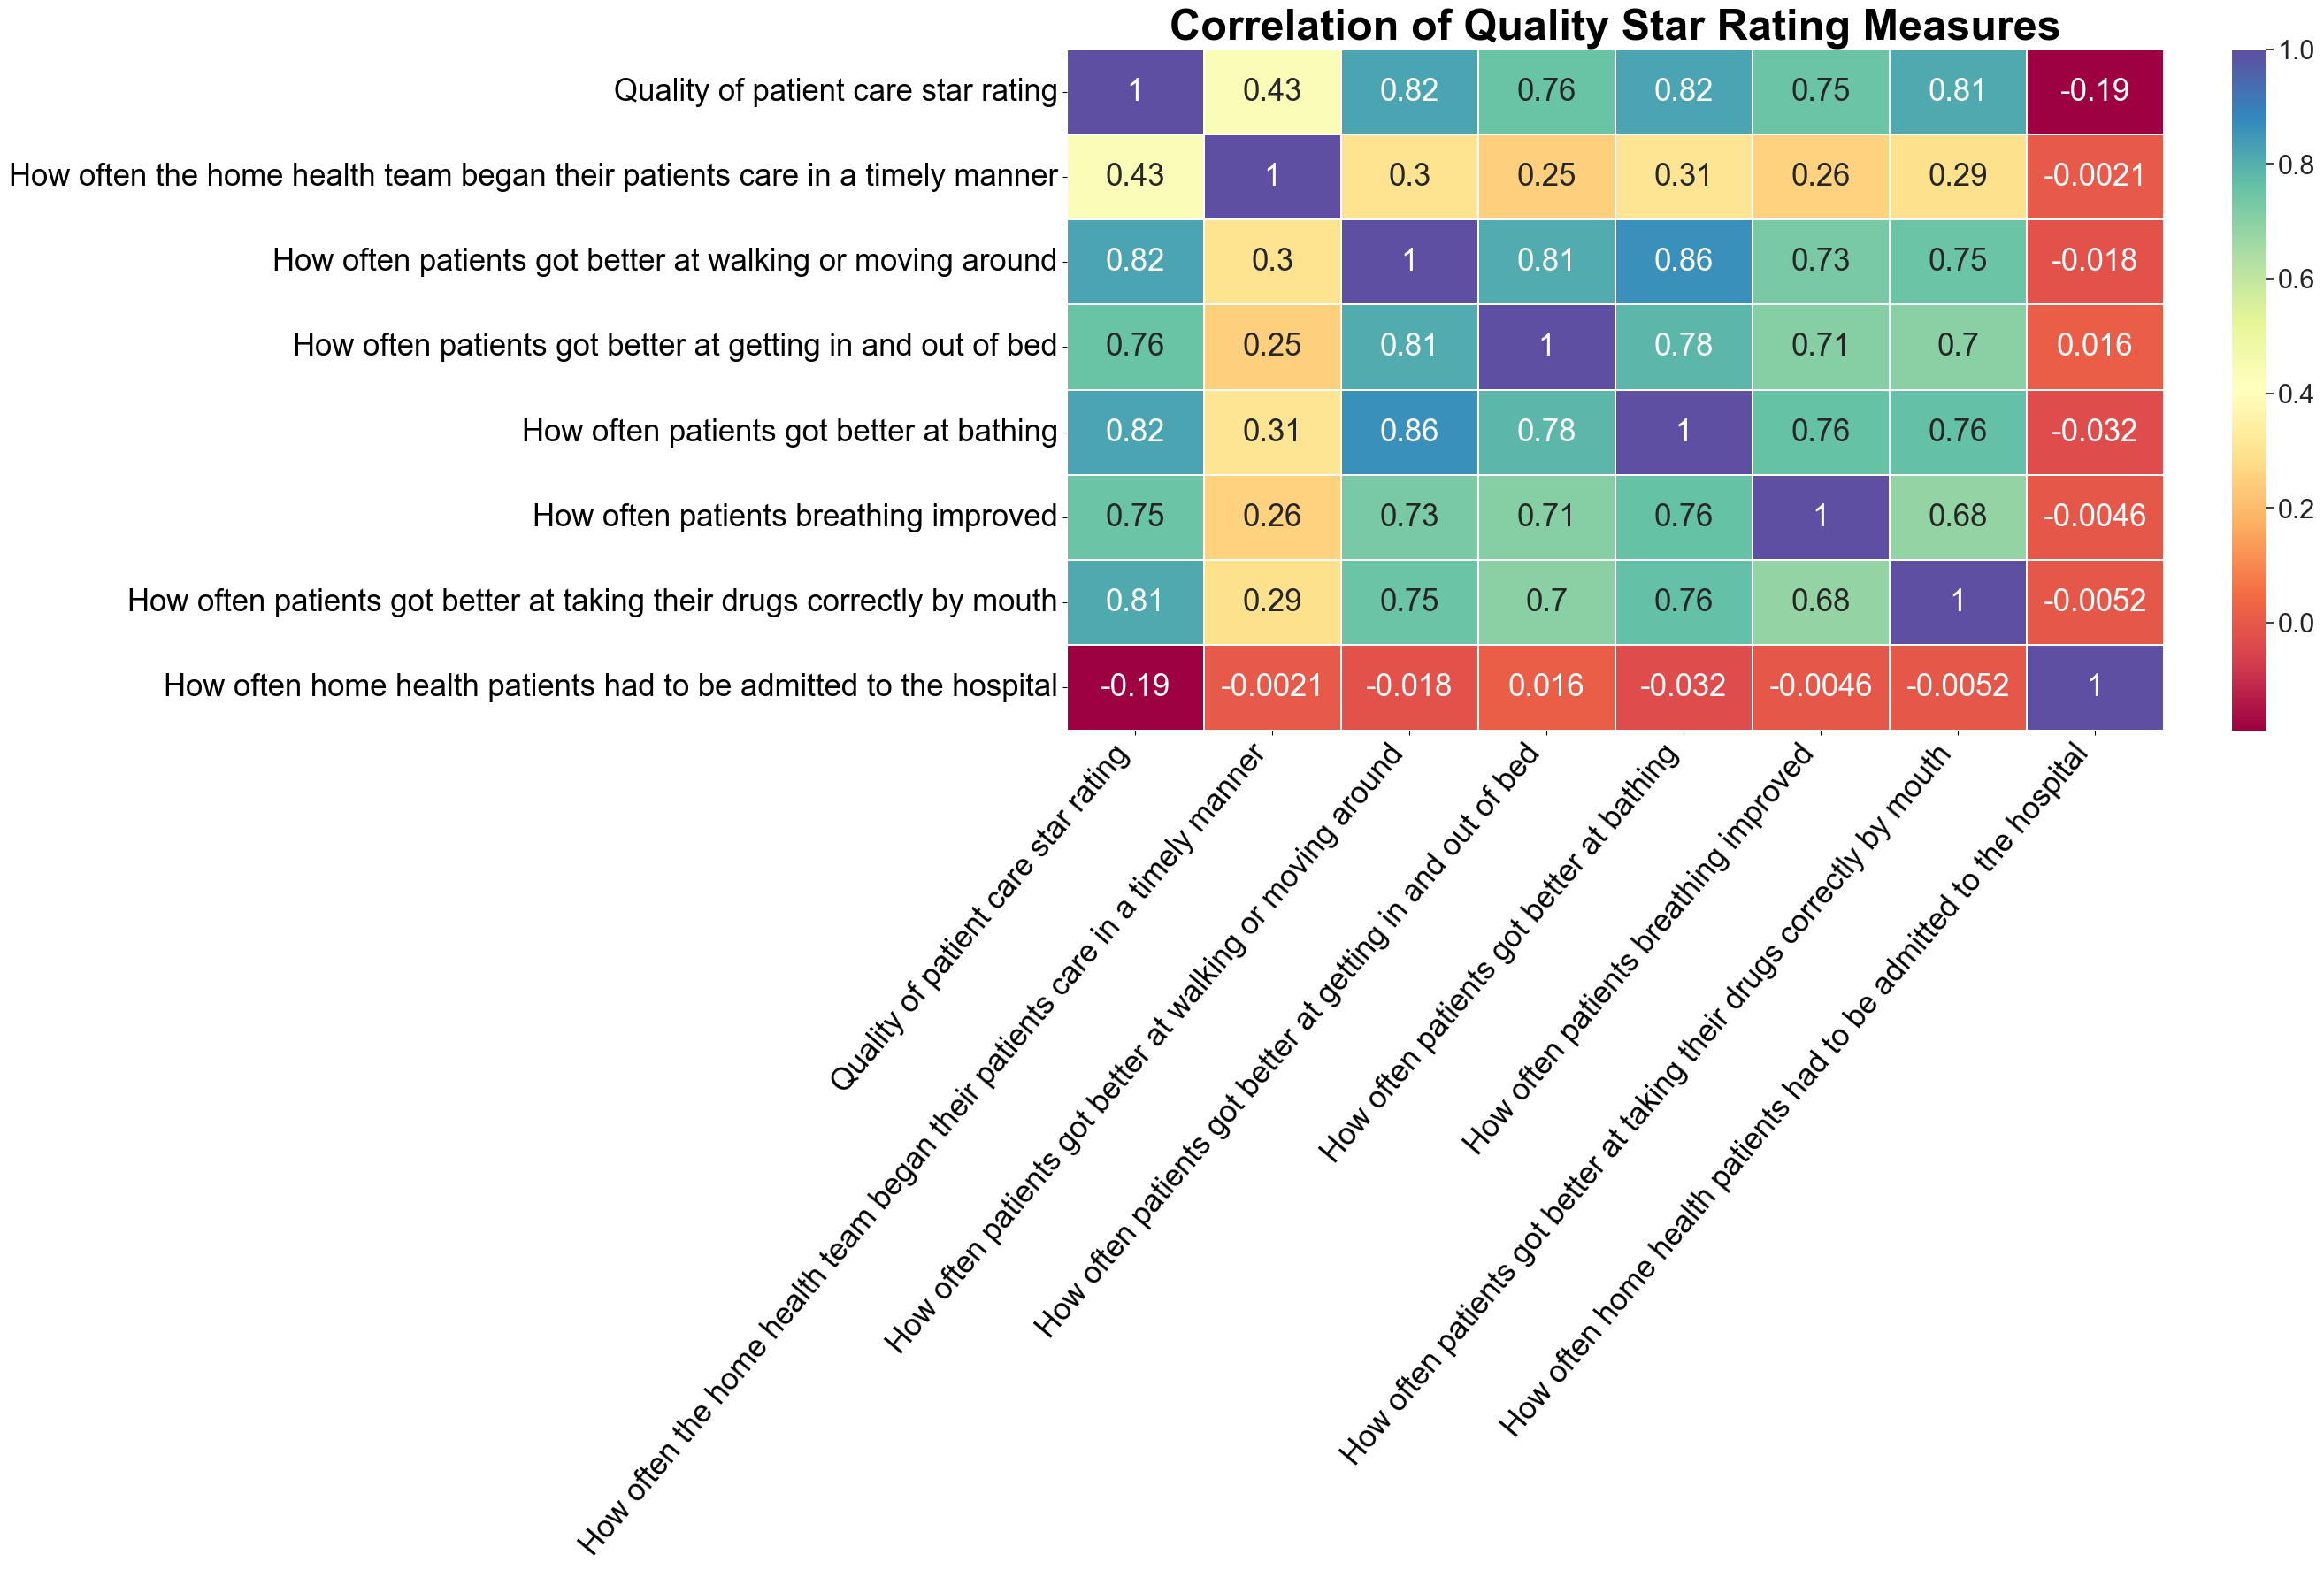

In [18]:
fig, ax = plt.subplots(figsize = (20, 10))

# Sample figsize in inches

sns.set(font_scale = 2.0)

g = sns.heatmap(star_rating_corr, xticklabels = star_rating_corr.columns, yticklabels = star_rating_corr.columns, 
            annot = True, linewidths = .2, ax = ax, cmap = 'Spectral', annot_kws={'size': 25})
g.set_xticklabels(g.get_xticklabels(), rotation = 50, fontsize = 25, ha = "right")
g.set_yticklabels(g.get_yticklabels(), rotation = 0, fontsize = 25, va = "center")
plt.title('Correlation of Quality Star Rating Measures', fontsize = 35, fontweight = 'bold')

In [19]:
star_rating_df.describe().style.set_properties(**{'text-align': 'right'})


,Quality of patient care star rating,How often the home health team began their patients care in a timely manner,How often patients got better at walking or moving around,How often patients got better at getting in and out of bed,How often patients got better at bathing,How often patients breathing improved,How often patients got better at taking their drugs correctly by mouth,How often home health patients had to be admitted to the hospital
count,7786.000000,8419.000000,7846.000000,7816.000000,7869.000000,7674.000000,7739.000000,6861.000000
mean,3.249743,94.127771,77.846941,79.067694,80.683607,78.400404,74.704161,13.995817
std,1.022742,8.995277,14.878897,14.947192,14.873205,17.943180,16.448971,3.991187
min,1.000000,20.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,2.500000,92.700000,71.700000,73.300000,75.300000,72.500000,66.100000,11.600000
50%,3.500000,97.800000,81.100000,83.200000,84.300000,83.700000,77.900000,13.900000
75%,4.000000,99.600000,87.600000,88.600000,90.300000,90.100000,86.100000,16.100000
max,5.000000,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,38.800000


### Quality Star Rating Distribution


In [20]:
star_rating = pd.DataFrame(df['Quality of patient care star rating'].value_counts())
star_rating.style.set_properties(**{'text-align': 'right'})


,Quality of patient care star rating
3.500000,1298
3.000000,1239
4.000000,1205
2.500000,1042
4.500000,1024
2.000000,802
1.500000,555
5.000000,488
1.000000,133


Text(0.5, 1.0, 'Quality Star Rating Distribution')

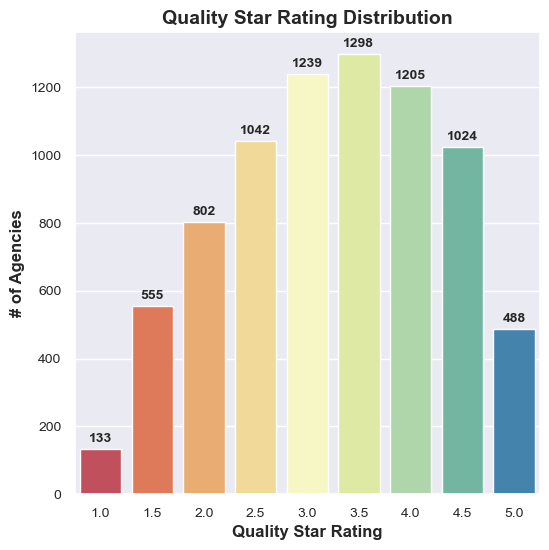

In [21]:
plt.figure(figsize = (6, 6))
ax = sns.countplot(x = 'Quality of patient care star rating', data = df, palette = 'Spectral')
ax.bar_label(ax.containers[0], label_type='edge', fontsize = 10, fontweight = 'bold', padding = 3)
plt.xticks(rotation = 0, size = 10)
plt.yticks(size = 10)
plt.xlabel('Quality Star Rating', size = 12, fontweight = 'bold')
plt.ylabel('# of Agencies', size = 12, fontweight = 'bold')
plt.title('Quality Star Rating Distribution', size = 14, fontweight = 'bold')


In [22]:
# Create star_rating_nat_df DataFrame.
star_rating_nat_df = df[['Quality of patient care star rating']].copy()
star_rating_nat_df.head()


,Quality of patient care star rating
0,4.5
1,2.0
2,2.0
3,4.0
4,2.0


In [23]:
star_rating_nat_df.describe()


,Quality of patient care star rating
count,7786.000000
mean,3.249743
std,1.022742
min,1.000000
25%,2.500000
50%,3.500000
75%,4.000000
max,5.000000


In [24]:
star_rating_nat_clean_df = star_rating_nat_df.dropna()
star_rating_nat_clean_df.describe()


,Quality of patient care star rating
count,7786.000000
mean,3.249743
std,1.022742
min,1.000000
25%,2.500000
50%,3.500000
75%,4.000000
max,5.000000


Text(0.5, 1.0, 'National:  Quality Star Rating')

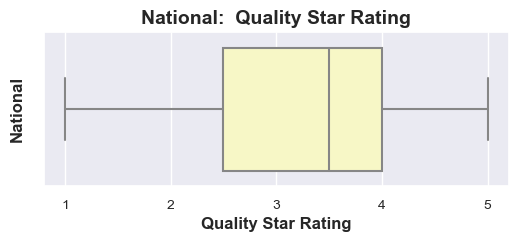

In [25]:
plt.figure(figsize = (6, 2))
sns.boxplot(data=star_rating_nat_clean_df, x='Quality of patient care star rating', 
            palette = 'Spectral')
plt.xticks(rotation = 0, size = 10)
plt.yticks(size = 10)
plt.xlabel('Quality Star Rating', size = 12, fontweight = 'bold')
plt.ylabel('National', size = 12, fontweight = 'bold')
plt.title('National:  Quality Star Rating', size = 14, fontweight = 'bold')


In [26]:
# Create star_rating_state_df DataFrame.
star_rating_state_df = df[['State',
                    'Quality of patient care star rating']].copy()
star_rating_state_df.head()


,State,Quality of patient care star rating
0,AK,4.5
1,AK,2.0
2,AK,2.0
3,AK,4.0
4,AK,2.0


In [27]:
star_rating_state_df.describe()


,Quality of patient care star rating
count,7786.000000
mean,3.249743
std,1.022742
min,1.000000
25%,2.500000
50%,3.500000
75%,4.000000
max,5.000000


In [28]:
star_rating_state_clean_df = star_rating_state_df.dropna()
star_rating_state_clean_df.describe()

,Quality of patient care star rating
count,7786.000000
mean,3.249743
std,1.022742
min,1.000000
25%,2.500000
50%,3.500000
75%,4.000000
max,5.000000


In [29]:
# Create a State summary by using .groupby
star_rating_state_clean_df.groupby(['State']).agg({'Quality of patient care star rating':['count', 'mean', 'median', 'min', 'max']}).reset_index().style.set_properties(**{'text-align': 'right'})


In [30]:
star_rating_state_clean_df.groupby(['State']).agg({'Quality of patient care star rating':['count', 'mean', 'median', 'min', 'max']}).reset_index().tail(27).style.set_properties(**{'text-align': 'right'})

Text(0.5, 1.0, 'Quality of Patient Care Star Rating \n by State/Territory')

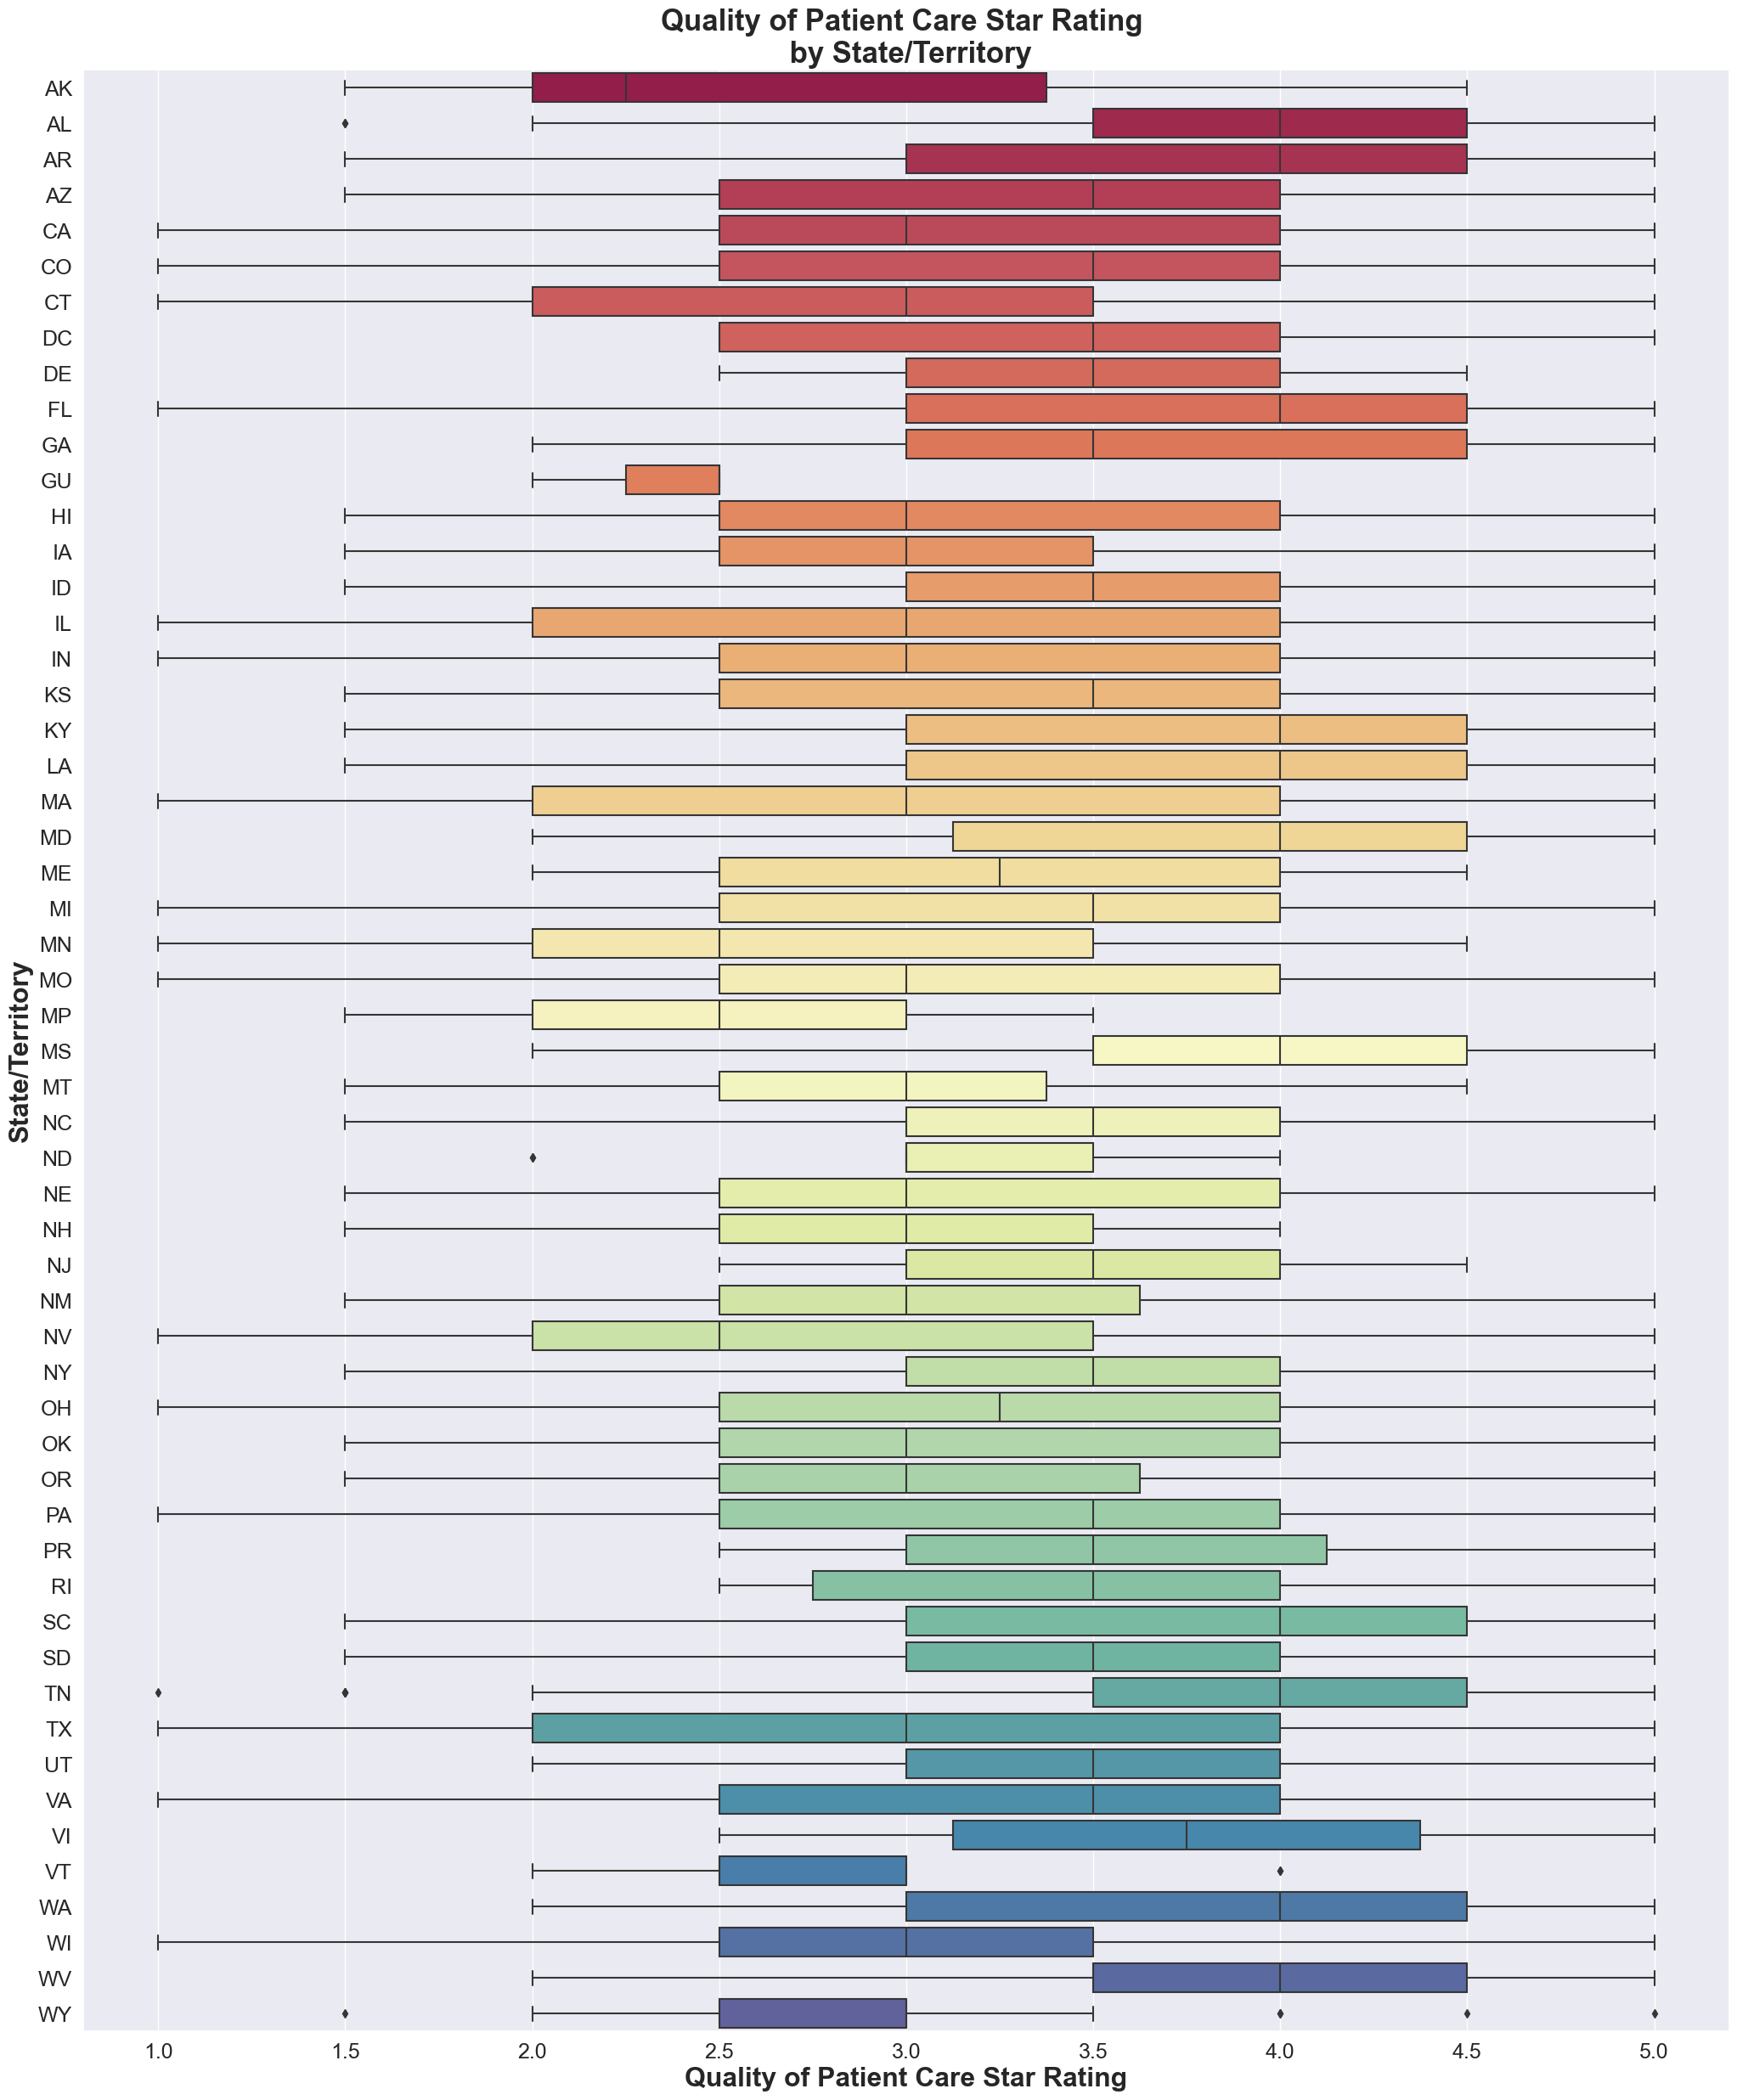

In [31]:
plt.figure(figsize = (25, 30))
sns.boxplot(data=star_rating_state_clean_df, x='Quality of patient care star rating', 
            y='State', palette = 'Spectral')
plt.xticks(rotation = 0, size = 18)
plt.yticks(size = 18)
plt.xlabel('Quality of Patient Care Star Rating', size = 23, fontweight = 'bold')
plt.ylabel('State/Territory', size = 23, fontweight = 'bold')
plt.title('Quality of Patient Care Star Rating \n by State/Territory', size = 25, fontweight = 'bold')


In [32]:
star_rating_state_avg = star_rating_state_clean_df.groupby(['State']).agg({'Quality of patient care star rating':['mean']}).reset_index()
star_rating_state_avg


,State,Quality of patient care star rating
,,mean
0,AK,2.642857
1,AL,3.964912
2,AR,3.596774
3,AZ,3.360465
4,CA,3.214708
5,CO,3.213675
6,CT,2.971014
7,DC,3.444444
8,DE,3.576923


In [33]:
# States having the TOP 15 average quality star rating
star_new_sort = star_rating_state_clean_df.groupby(['State'])['Quality of patient care star rating'].mean().sort_values(ascending=False).reset_index()
star_new_sort_top = star_new_sort.head(15)
star_new_sort_top


,State,Quality of patient care star rating
0,AL,3.964912
1,MS,3.895349
2,WV,3.823529
3,TN,3.809735
4,MD,3.800000
5,WA,3.796875
6,SC,3.771429
7,VI,3.750000
8,KY,3.747126
9,LA,3.700000


Text(0.5, 1.0, 'Top 15 Quality of Patient Care Star Rating \n by State/Territory')

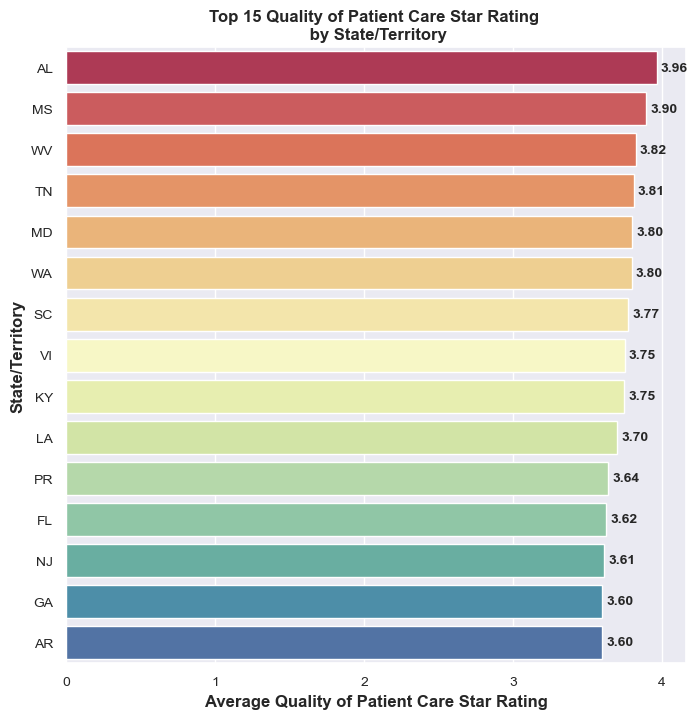

In [34]:
plt.figure(figsize = (8, 8))
ax = sns.barplot(data=star_new_sort_top, x='Quality of patient care star rating', 
            y='State', palette = 'Spectral')
ax.bar_label(ax.containers[0], label_type='edge', fontsize = 10, fontweight = 'bold', padding = 3, fmt = '%#.2f')
plt.xticks(rotation = 0, size = 10)
plt.yticks(size = 10)
plt.xlabel('Average Quality of Patient Care Star Rating', size = 12, fontweight = 'bold')
plt.ylabel('State/Territory', size = 12, fontweight = 'bold')
plt.title('Top 15 Quality of Patient Care Star Rating \n by State/Territory', size = 12, fontweight = 'bold')


In [35]:
#States having the BOTTOM 15 average quality star rating
star_new_sort_bottom = star_new_sort.tail(15)
star_new_sort_bottom


,State,Quality of patient care star rating
40,IL,3.003378
41,WY,3.000000
42,WI,2.993671
43,NH,2.978261
44,CT,2.971014
45,IA,2.940000
46,MA,2.913534
47,MT,2.909091
48,TX,2.877395
49,NV,2.813953


Text(0.5, 1.0, 'Bottom 15 Quality of Patient Care Star Rating \n by State/Territory')

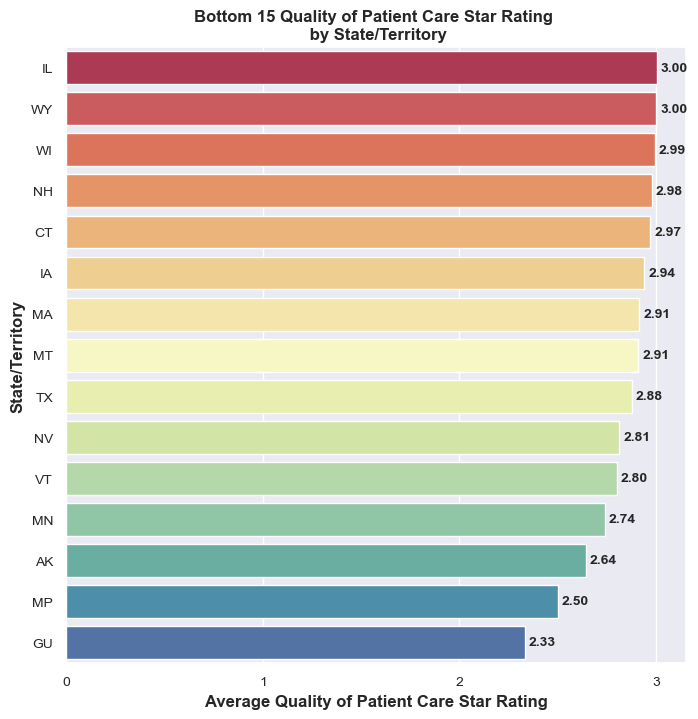

In [36]:
plt.figure(figsize = (8, 8))
ax = sns.barplot(data=star_new_sort_bottom, x='Quality of patient care star rating', 
            y='State', palette = 'Spectral')
ax.bar_label(ax.containers[0], label_type='edge', fontsize = 10, fontweight = 'bold', padding = 3, fmt = '%#.2f')
plt.xticks(rotation = 0, size = 10)
plt.yticks(size = 10)
plt.xlabel('Average Quality of Patient Care Star Rating', size = 12, fontweight = 'bold')
plt.ylabel('State/Territory', size = 12, fontweight = 'bold')
plt.title('Bottom 15 Quality of Patient Care Star Rating \n by State/Territory', size = 12, fontweight = 'bold')

In [37]:
usa = gpd.read_file('Resources/states.shp')
usa.head()


,STATE_NAME,DRAWSEQ,STATE_FIPS,SUB_REGION,STATE_ABBR,geometry
0,Hawaii,1,15,Pacific,HI,"MULTIPOLYGON (((-160.07380 22.00418, -160.0497..."
1,Washington,2,53,Pacific,WA,"MULTIPOLYGON (((-122.40202 48.22522, -122.4628..."
2,Montana,3,30,Mountain,MT,"POLYGON ((-111.47543 44.70216, -111.48080 44.6..."
3,Maine,4,23,New England,ME,"MULTIPOLYGON (((-69.77728 44.07415, -69.85993 ..."
4,North Dakota,5,38,West North Central,ND,"POLYGON ((-98.73044 45.93827, -99.00683 45.939..."


In [38]:
usa.tail()


,STATE_NAME,DRAWSEQ,STATE_FIPS,SUB_REGION,STATE_ABBR,geometry
46,Arkansas,47,05,West South Central,AR,"POLYGON ((-94.46169 34.19677, -94.45262 34.508..."
47,Louisiana,48,22,West South Central,LA,"MULTIPOLYGON (((-93.70752 30.23958, -93.69938 ..."
48,Florida,49,12,South Atlantic,FL,"MULTIPOLYGON (((-80.78566 28.78519, -80.76242 ..."
49,Michigan,50,26,East North Central,MI,"MULTIPOLYGON (((-88.49753 48.17380, -88.62533 ..."
50,Alaska,51,02,Pacific,AK,"MULTIPOLYGON (((-161.33379 58.73325, -161.3824..."


<AxesSubplot: >

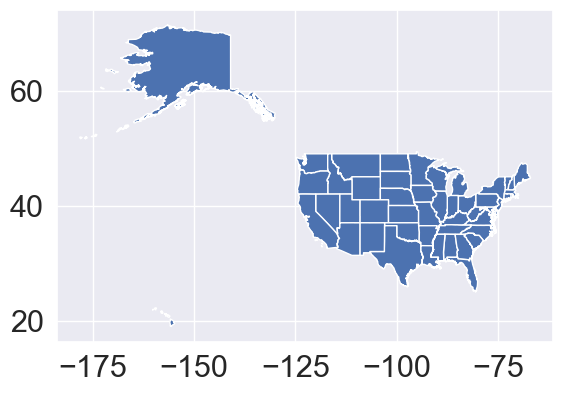

In [39]:
usa.plot()


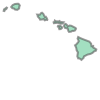

In [40]:
usa.loc[0, 'geometry']


<AxesSubplot: >

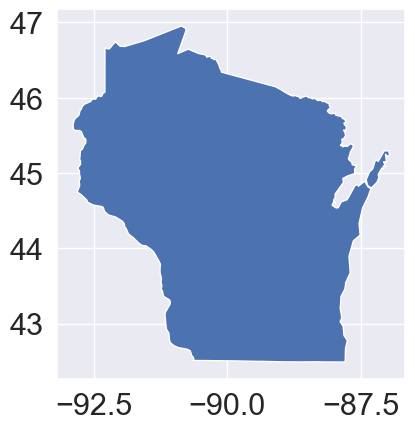

In [41]:
usa[usa.STATE_ABBR == 'WI'].plot()


<AxesSubplot: >

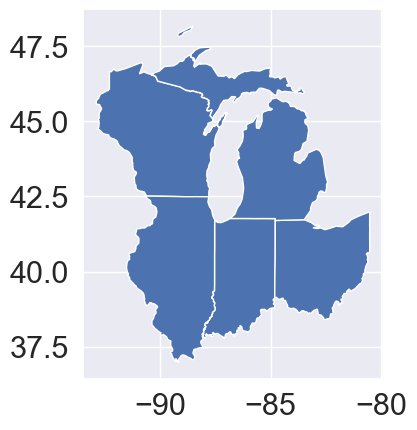

In [42]:
usa[usa.SUB_REGION == 'East North Central'].plot()


In [47]:
def state_plotter(states, us_map = True):

#Setting up us_map as an input.  If you want to return states that are spread out, leave it set to true.
#If you are plotting bordering states and prefer to zoom in.

    #Instantiate a matplotlib figure
    #To change size, use x_lim and y_lim.  Changing the figsize will not change the size of the map.
    fig, ax = plt.subplots(figsize = (30, 30))
    
    if us_map:   #These codes will execute if us_map is set to True (default)
        
        #The following series of if/elif/else statements provide control over
        #whether Alaska and Hawaii will show up in the map.  Because of their
        #distance from the lower 48, and the size of Alaska, we don't want them
        #in the map unless necessary.
        
        if 'HI' in states:
            usa[0:50].plot(ax=ax, alpha = 0.3)
            
        elif 'AK' in states:
            usa[1:51].plot(ax=ax, alpha = 0.3)
            
        elif 'AK' and 'HI' in states:
            usa[0:51].plot(ax=ax, alpha = 0.3)
            
        else:
            usa[1:50].plot(ax=ax, alpha = 0.3)
            
        #The following loop will go through the list of input state abbreviations and plot them
        #ax=ax makes the states appear on the initial matplotlib figure.
        
        for n in states:
            usa[usa.STATE_ABBR == f'{n}'].plot(ax=ax, edgecolor = 'y', linewidth = 2)
            
        #If you choose not to have the first layer of the whole USA, this will plot states on their own.
        
    elif us_map == False:
        for n in states:
            usa[usa.STATE_ABBR == f'{n}'].plot(ax=ax, edgecolor = 'y', linewidth = 2)


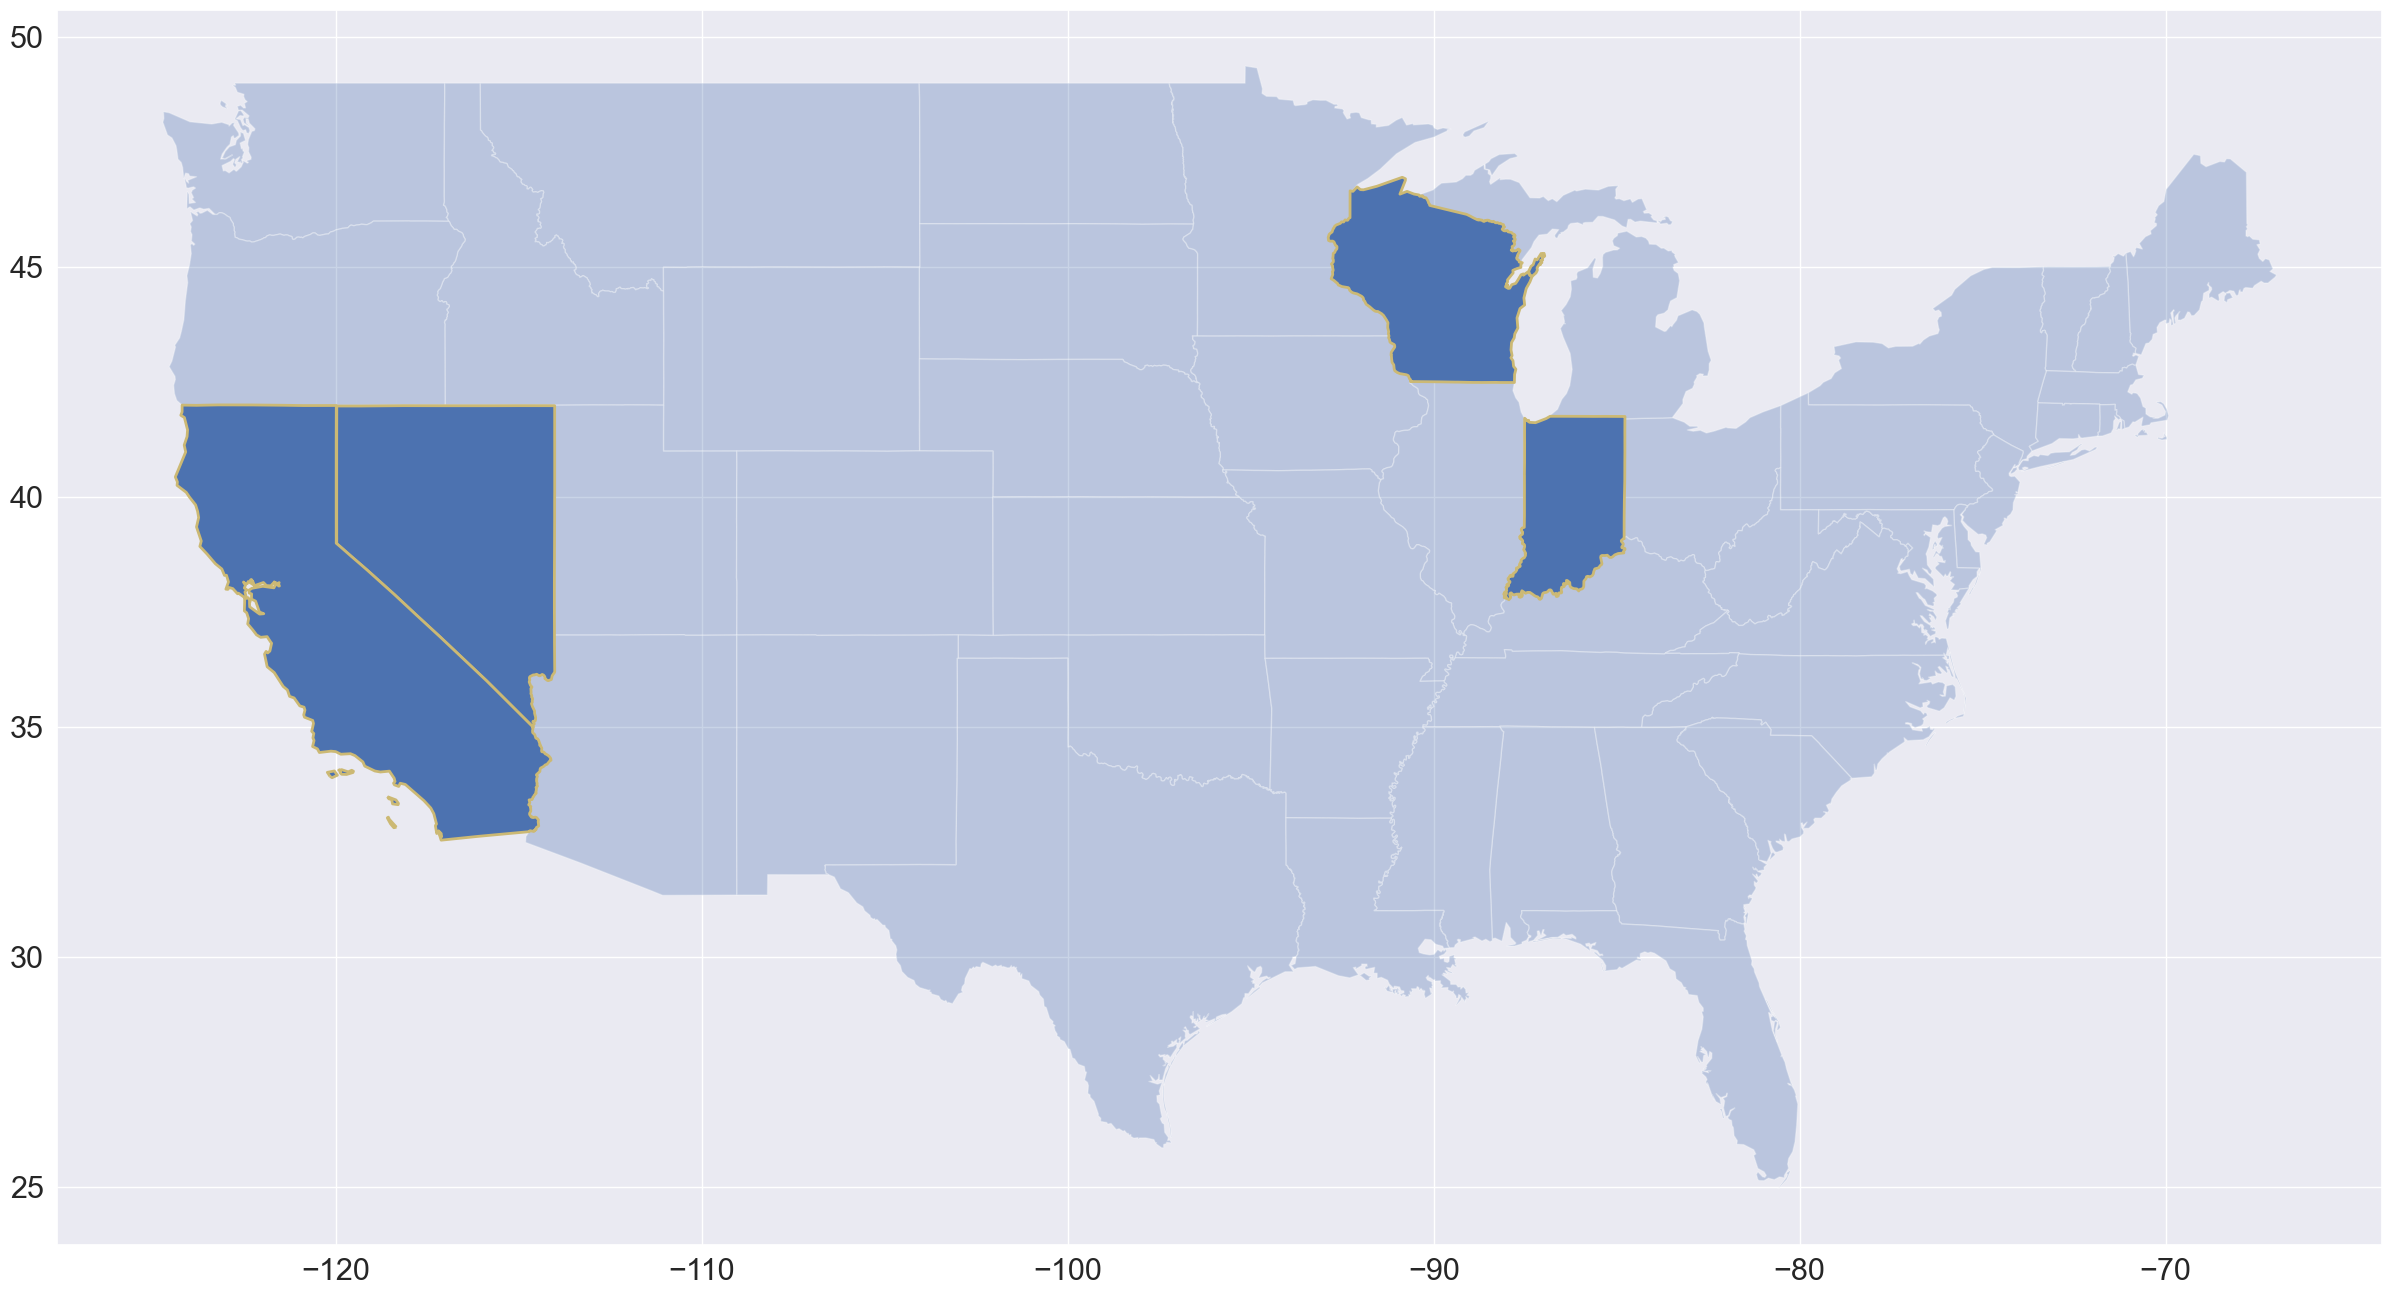

In [48]:
state_plotter(['NV', 'IN', 'WI', 'CA'])


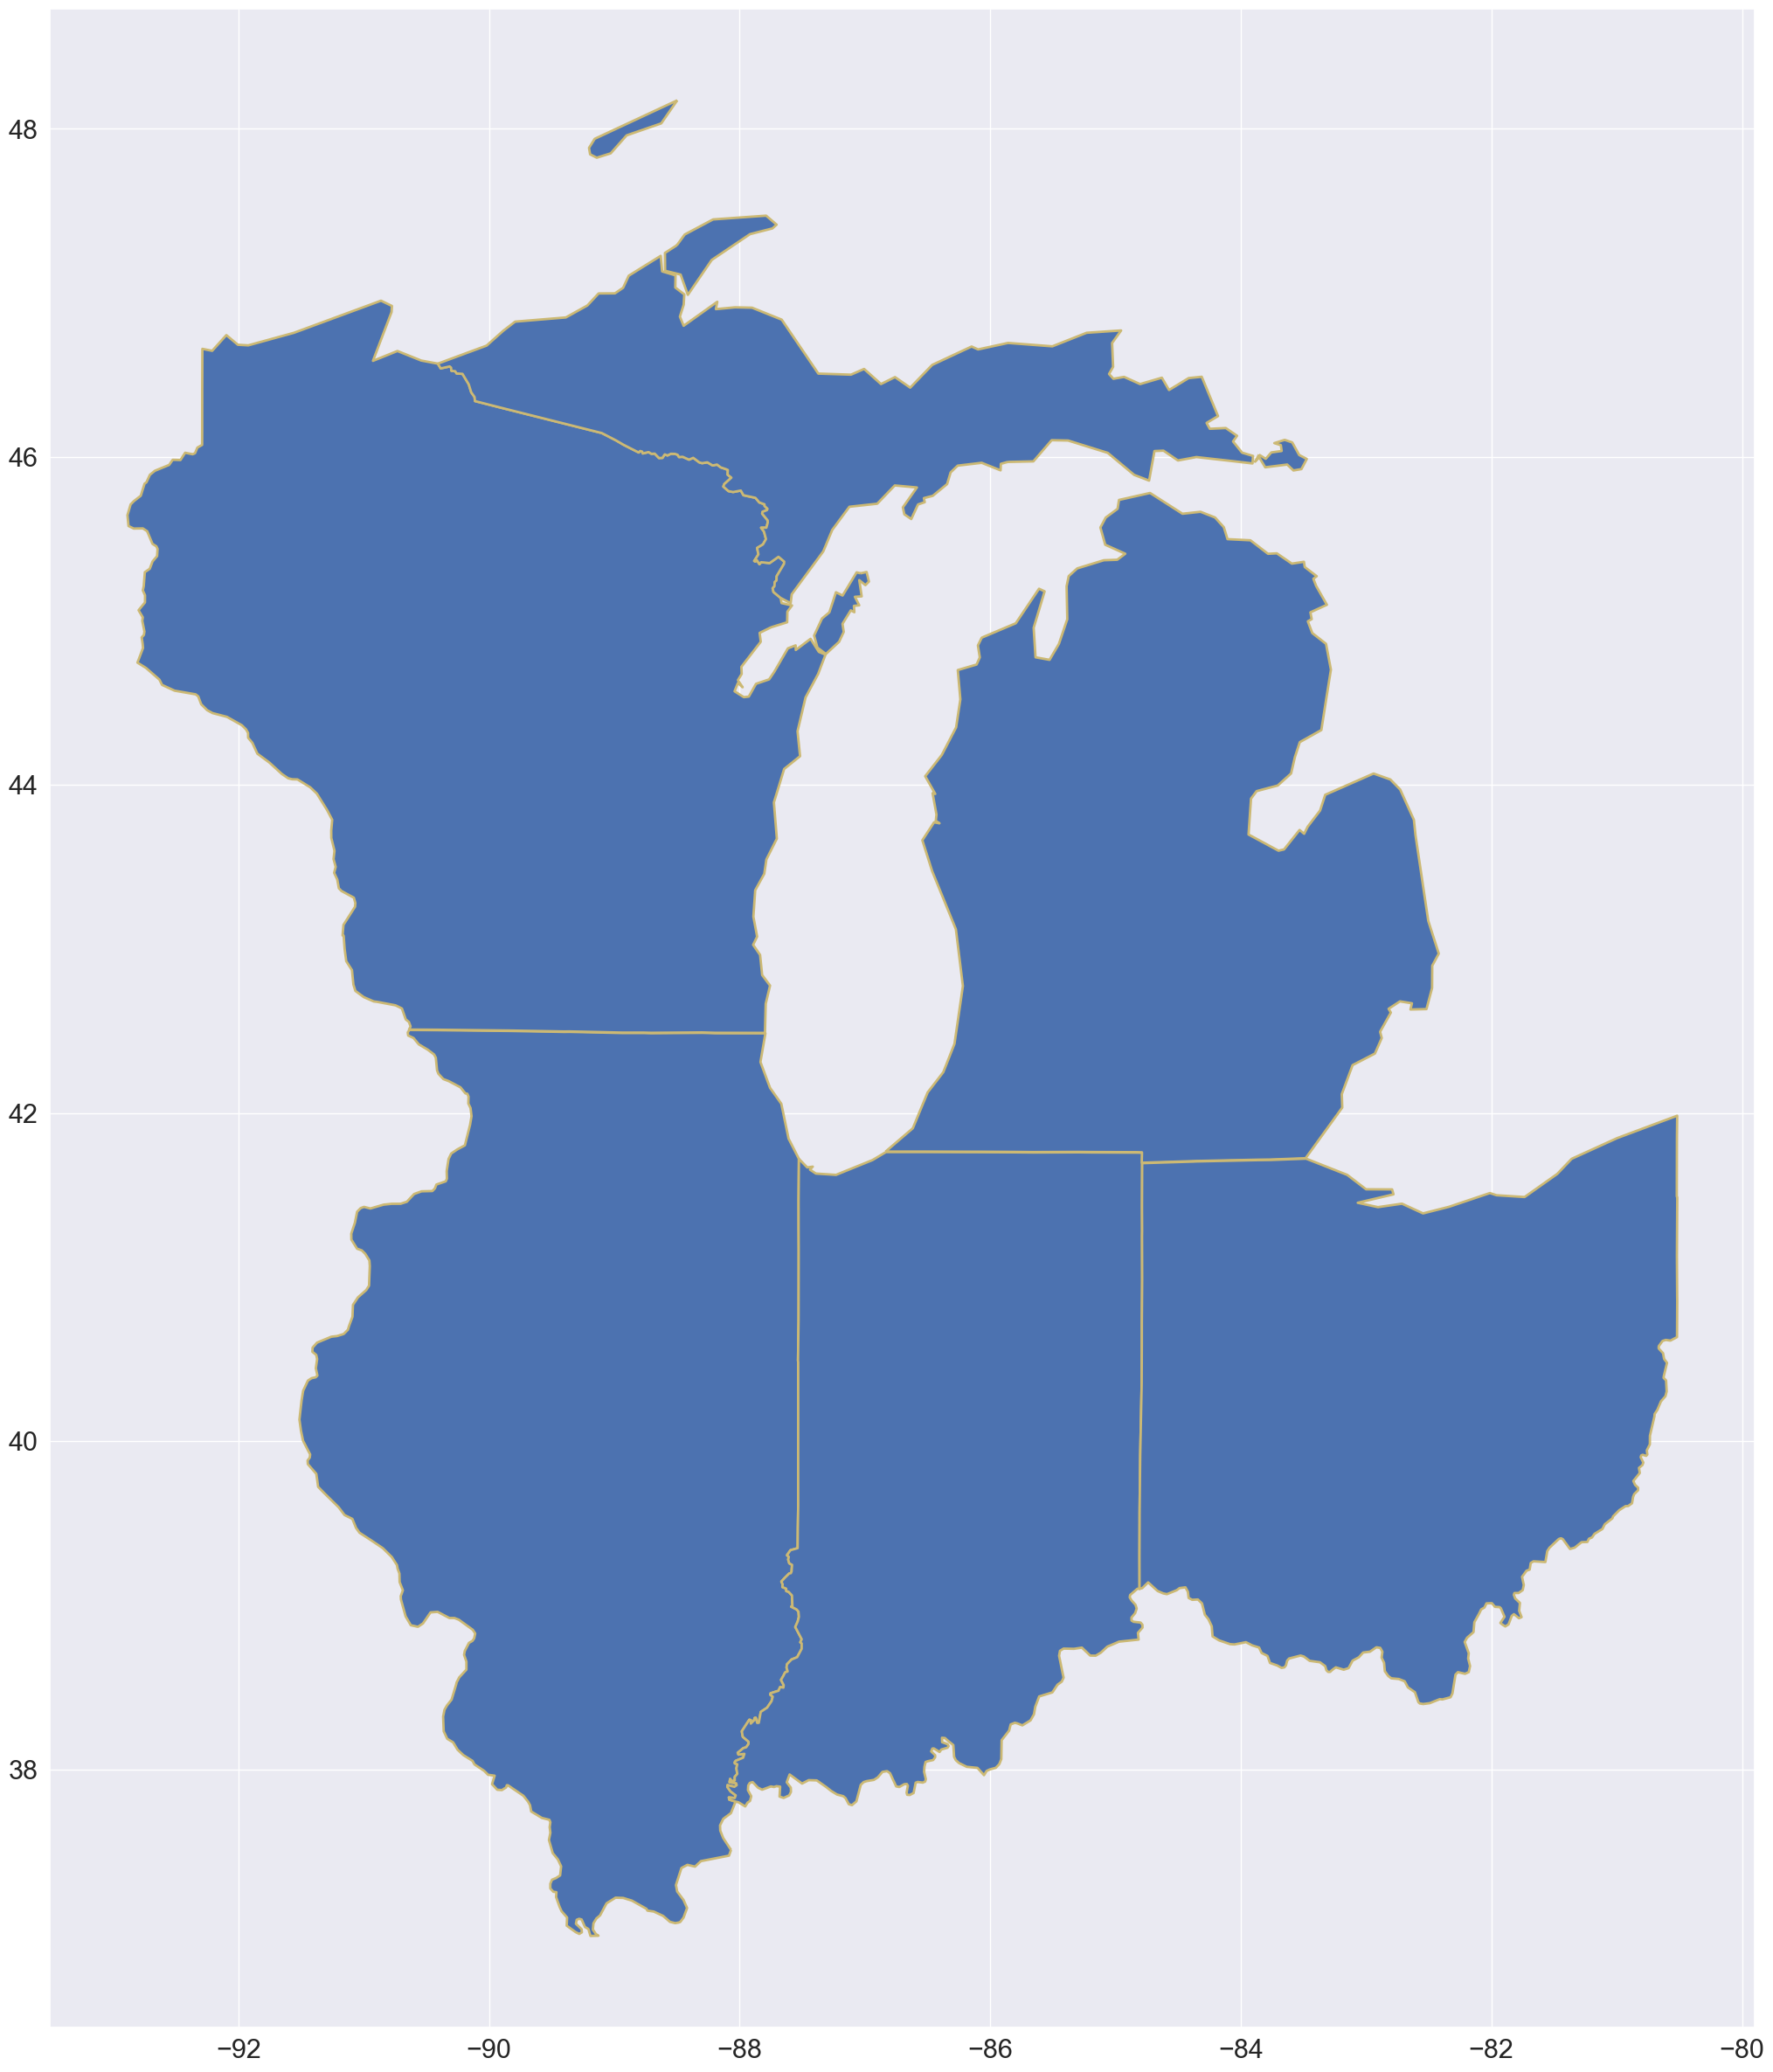

In [49]:
state_plotter(['IL', 'IN', 'WI', 'MI', 'OH'], us_map = False)


### Quality Star Rating Based on Type of Ownership
* GOVERNMENT - COMBINATION GOVT & VOLUNTARY
* GOVERNMENT - LOCAL
* GOVERNMENT - STATE/COUNTY
* PROPRIETARY
* VOLUNTARY NON-PROFIT - OTHER
* VOLUNTARY NON-PROFIT - PRIVATE
* VOLUNTARY NON PROFIT - RELIGIOUS AFFILIATION


In [ ]:
# Create the star_rating_too_df DataFrame.
star_rating_too_df = df[['Type of Ownership',
                    'Quality of patient care star rating', 
                     'How often the home health team began their patients care in a timely manner',
                    'How often patients got better at walking or moving around',
                    'How often patients got better at getting in and out of bed',
                    'How often patients got better at bathing',
                    'How often patients breathing improved',
                    'How often patients got better at taking their drugs correctly by mouth',
                    'How often home health patients had to be admitted to the hospital']].copy()
star_rating_too_df.head().style.set_properties(**{'text-align': 'right'})


In [ ]:
star_rating_too_df.tail().style.set_properties(**{'text-align': 'right'})


In [ ]:
star_rating_too_df.describe().style.set_properties(**{'text-align': 'right'})


In [ ]:
star_rating_too_clean_df = star_rating_too_df.dropna()
star_rating_too_clean_df.describe().style.set_properties(**{'text-align': 'right'})


In [ ]:
# Create star_rating__only_too_clean_df DataFrame.
star_rating_only_too_clean_df = star_rating_too_clean_df[['Type of Ownership',
                    'Quality of patient care star rating']].copy()
star_rating_only_too_clean_df.head().style.set_properties(**{'text-align': 'right'})


In [ ]:
# Total of ownership type for each type
total_ownership_type_by_type = star_rating_too_clean_df.groupby(['Type of Ownership']).count()['Quality of patient care star rating']
total_ownership_type_by_type


In [ ]:
# Create a Type of Ownership summary using .groupby
star_rating_too_clean_df.groupby(['Type of Ownership']).agg({'Quality of patient care star rating':['count', 'mean', 'median', 'min', 'max']}).reset_index().style.set_properties(**{'text-align': 'right'})


In [ ]:
plt.figure(figsize = (18, 12))
sns.boxplot(data=star_rating_only_too_clean_df, x='Quality of patient care star rating', 
            y='Type of Ownership', palette = 'Spectral')
plt.xticks(rotation = 0, size = 18)
plt.yticks(size = 18)
plt.xlabel('Quality of Patient Care Star Rating', size = 25, fontweight = 'bold')
plt.ylabel('Type of Ownership', size = 25, fontweight = 'bold')
plt.title('Quality of Patient Care Star Rating \n by Type of Ownership', size = 27, fontweight = 'bold')


In [ ]:
# Create a Type of Ownership DataFrame for each type

gov_combo_df = star_rating_too_clean_df[star_rating_too_clean_df["Type of Ownership"] == 'GOVERNMENT - COMBINATION GOVT & VOLUNTARY']

gov_loc_df = star_rating_too_clean_df[star_rating_too_clean_df["Type of Ownership"] == 'GOVERNMENT - LOCAL']

gov_state_county_df = star_rating_too_clean_df[star_rating_too_clean_df["Type of Ownership"] == 'GOVERNMENT - STATE/COUNTY']

prop_df = star_rating_too_clean_df[star_rating_too_clean_df["Type of Ownership"] == 'PROPRIETARY']

vol_non_prof_rel_df = star_rating_too_clean_df[star_rating_too_clean_df["Type of Ownership"] == 'VOLUNTARY NON PROFIT - RELIGIOUS AFFILIATION']

vol_non_prof_other_df = star_rating_too_clean_df[star_rating_too_clean_df["Type of Ownership"] == 'VOLUNTARY NON-PROFIT - OTHER']

vol_non_prof_priv_df = star_rating_too_clean_df[star_rating_too_clean_df["Type of Ownership"] == 'VOLUNTARY NON-PROFIT - PRIVATE']


In [ ]:
gov_combo_df.head().style.set_properties(**{'text-align': 'right'})


In [ ]:
gov_combo_df.describe().style.set_properties(**{'text-align': 'right'})


In [ ]:
gov_combo_star_rating = pd.DataFrame(gov_combo_df['Quality of patient care star rating'].value_counts())
gov_combo_star_rating.style.set_properties(**{'text-align': 'right'})


In [ ]:
plt.figure(figsize = (6, 6))
ax = sns.countplot(x = 'Quality of patient care star rating', data = gov_combo_df, palette = 'Spectral')
ax.bar_label(ax.containers[0], label_type='edge', fontsize = 10, fontweight = 'bold', padding = 3)
plt.xticks(rotation = 0, size = 10)
plt.yticks(size = 10)
plt.xlabel('Quality Star Rating', size = 12, fontweight = 'bold')
plt.ylabel('# of Agencies', size = 12, fontweight = 'bold')
plt.title('Government Combination \n Quality Star Rating Distribution', size = 14, fontweight = 'bold')


In [ ]:
gov_loc_df.head().style.set_properties(**{'text-align': 'right'})


In [ ]:
gov_loc_df.describe().style.set_properties(**{'text-align': 'right'})


In [ ]:
gov_loc_star_rating = pd.DataFrame(gov_loc_df['Quality of patient care star rating'].value_counts())
gov_loc_star_rating.style.set_properties(**{'text-align': 'right'})


In [ ]:
plt.figure(figsize = (6, 6))
ax = sns.countplot(x = 'Quality of patient care star rating', data = gov_loc_df, palette = 'Spectral')
ax.bar_label(ax.containers[0], label_type='edge', fontsize = 10, fontweight = 'bold', padding = 3)
plt.xticks(rotation = 0, size = 10)
plt.yticks(size = 10)
plt.xlabel('Quality Star Rating', size = 12, fontweight = 'bold')
plt.ylabel('# of Agencies', size = 12, fontweight = 'bold')
plt.title('Government Local \n Quality Star Rating Distribution', size = 14, fontweight = 'bold')


In [ ]:
gov_state_county_df.head().style.set_properties(**{'text-align': 'right'})


In [ ]:
gov_state_county_df.describe().style.set_properties(**{'text-align': 'right'})


In [ ]:
gov_state_county_star_rating = pd.DataFrame(gov_state_county_df['Quality of patient care star rating'].value_counts())
gov_state_county_star_rating.style.set_properties(**{'text-align': 'right'})


In [ ]:
plt.figure(figsize = (6, 6))
ax = sns.countplot(x = 'Quality of patient care star rating', data = gov_state_county_df, palette = 'Spectral')
ax.bar_label(ax.containers[0], label_type='edge', fontsize = 10, fontweight = 'bold', padding = 3)
plt.xticks(rotation = 0, size = 10)
plt.yticks(size = 10)
plt.xlabel('Quality Star Rating', size = 12, fontweight = 'bold')
plt.ylabel('# of Agencies', size = 12, fontweight = 'bold')
plt.title('Government State/County \n Quality Star Rating Distribution', size = 14, fontweight = 'bold')


In [ ]:
prop_df.head().style.set_properties(**{'text-align': 'right'})


In [ ]:
prop_df.describe().style.set_properties(**{'text-align': 'right'})


In [ ]:
prop_star_rating = pd.DataFrame(prop_df['Quality of patient care star rating'].value_counts())
prop_star_rating.style.set_properties(**{'text-align': 'right'})


In [ ]:
plt.figure(figsize = (6, 6))
ax = sns.countplot(x = 'Quality of patient care star rating', data = prop_df, palette = 'Spectral')
ax.bar_label(ax.containers[0], label_type='edge', fontsize = 10, fontweight = 'bold', padding = 3)
plt.xticks(rotation = 0, size = 10)
plt.yticks(size = 10)
plt.xlabel('Quality Star Rating', size = 12, fontweight = 'bold')
plt.ylabel('# of Agencies', size = 12, fontweight = 'bold')
plt.title('Proprietary \n Quality Star Rating Distribution', size = 14, fontweight = 'bold')


In [ ]:
vol_non_prof_rel_df.head().style.set_properties(**{'text-align': 'right'})


In [ ]:
vol_non_prof_rel_df.describe().style.set_properties(**{'text-align': 'right'})


In [ ]:
vol_non_prof_rel_star_rating = pd.DataFrame(vol_non_prof_rel_df['Quality of patient care star rating'].value_counts())
vol_non_prof_rel_star_rating.style.set_properties(**{'text-align': 'right'})


In [ ]:
plt.figure(figsize = (6, 6))
ax = sns.countplot(x = 'Quality of patient care star rating', data = vol_non_prof_rel_df, palette = 'Spectral')
ax.bar_label(ax.containers[0], label_type='edge', fontsize = 10, fontweight = 'bold', padding = 3)
plt.xticks(rotation = 0, size = 10)
plt.yticks(size = 10)
plt.xlabel('Quality Star Rating', size = 12, fontweight = 'bold')
plt.ylabel('# of Agencies', size = 12, fontweight = 'bold')
plt.title('Voluntary Non-Profit Religious \n Quality Star Rating Distribution', size = 14, fontweight = 'bold')


In [ ]:
vol_non_prof_other_df.head().style.set_properties(**{'text-align': 'right'})


In [ ]:
vol_non_prof_other_df.describe().style.set_properties(**{'text-align': 'right'})


In [ ]:
vol_non_prof_other_star_rating = pd.DataFrame(vol_non_prof_other_df['Quality of patient care star rating'].value_counts())
vol_non_prof_other_star_rating.style.set_properties(**{'text-align': 'right'})


In [ ]:
plt.figure(figsize = (6, 6))
ax = sns.countplot(x = 'Quality of patient care star rating', data = vol_non_prof_other_df, palette = 'Spectral')
ax.bar_label(ax.containers[0], label_type='edge', fontsize = 10, fontweight = 'bold', padding = 3)
plt.xticks(rotation = 0, size = 10)
plt.yticks(size = 10)
plt.xlabel('Quality Star Rating', size = 12, fontweight = 'bold')
plt.ylabel('# of Agencies', size = 12, fontweight = 'bold')
plt.title('Voluntary Non-Profit Other \n Quality Star Rating Distribution', size = 14, fontweight = 'bold')


In [ ]:
vol_non_prof_priv_df.head().style.set_properties(**{'text-align': 'right'})


In [ ]:
vol_non_prof_priv_df.describe().style.set_properties(**{'text-align': 'right'})


In [ ]:
vol_non_prof_priv_star_rating = pd.DataFrame(vol_non_prof_priv_df['Quality of patient care star rating'].value_counts())
vol_non_prof_priv_star_rating.style.set_properties(**{'text-align': 'right'})


In [ ]:
plt.figure(figsize = (6, 6))
ax = sns.countplot(x = 'Quality of patient care star rating', data = vol_non_prof_priv_df, palette = 'Spectral')
ax.bar_label(ax.containers[0], label_type='edge', fontsize = 10, fontweight = 'bold', padding = 3)
plt.xticks(rotation = 0, size = 10)
plt.yticks(size = 10)
plt.xlabel('Quality Star Rating', size = 12, fontweight = 'bold')
plt.ylabel('# of Agencies', size = 12, fontweight = 'bold')
plt.title('Voluntary Non-Profit Private \n Quality Star Rating Distribution', size = 14, fontweight = 'bold')


## Publically Reported Measures *NOT* Included in the Star Rating Measure (10)

### These measures include the following:
* How often the home health team taught patients (or their family caregivers) about their drugs
* How often the home health team determined whether patients received a flu shot for the current flu season
* How often patients receiving home health care needed urgent, unplanned care in the ER without being admitted
* Changes in skin integrity post-acute care: pressure ulcer/injury
* How often physician-recommended actions to address medication issues were completely timely
* Percent of Residents Experiencing One or More Falls with Major Injury
* Application of Percent of Long Term Care Hospital Patients with an Admission and Discharge Functional Assessment and a Care Plan that Addresses Function
* Discharge to Community (DTC) Risk-Standardized Rate
* Potentially Preventable 30-Day Post Discharge Readmission (PPR) Risk-Standardized Rate
* How much Medicare spends on an episode of care at this agency, compared to Medicare spending across all agencies nationally


### Home Health Team Teaching Patients About Their Drugs


In [ ]:
# Create the teach_drugs_nat_df DataFrame.
teach_drugs_nat_df = df[['How often the home health team taught patients (or their family caregivers) about their drugs']].copy()
teach_drugs_nat_df.head().style.set_properties(**{'text-align': 'right'})


In [ ]:
teach_drugs_nat_df.describe().style.set_properties(**{'text-align': 'right'})


In [ ]:
teach_drugs_nat_clean_df = teach_drugs_nat_df.dropna()
teach_drugs_nat_clean_df.describe().style.set_properties(**{'text-align': 'right'})


In [ ]:
plt.figure(figsize = (15, 2))
sns.boxplot(data=teach_drugs_nat_clean_df, x='How often the home health team taught patients (or their family caregivers) about their drugs', 
            palette = 'Spectral')
plt.xticks(rotation = 0, size = 12)
plt.yticks(size = 12)
plt.xlabel('Patients Taught About Their Drugs (%)', size = 12, fontweight = 'bold')
plt.ylabel('National', size = 12, fontweight = 'bold')
plt.title('National:  Patients Taught About Their Drugs', size = 14, fontweight = 'bold')


In [ ]:
# Create the teach_drugs_state_df DataFrame.
teach_drugs_state_df = df[['State',
                    'How often the home health team taught patients (or their family caregivers) about their drugs']].copy()
teach_drugs_state_df.head().style.set_properties(**{'text-align': 'right'})


In [ ]:
teach_drugs_state_df.describe().style.set_properties(**{'text-align': 'right'})


In [ ]:
teach_drugs_state_clean_df = teach_drugs_state_df.dropna()
teach_drugs_state_clean_df.describe().style.set_properties(**{'text-align': 'right'})


In [ ]:
# Create a teach_drugs_state_clean_df summary using .groupby
teach_drugs_state_clean_df.groupby(['State']).agg({'How often the home health team taught patients (or their family caregivers) about their drugs':['count', 'mean', 'median', 'min', 'max']}).reset_index().style.set_properties(**{'text-align': 'right'})


In [ ]:
# Create a teach_drugs_state_clean_df summary using .groupby
teach_drugs_state_clean_df.groupby(['State']).agg({'How often the home health team taught patients (or their family caregivers) about their drugs':['count', 'mean', 'median', 'min', 'max']}).reset_index().head(28).style.set_properties(**{'text-align': 'right'})

In [ ]:
# Create a teach_drugs_state_clean_df summary using .groupby
teach_drugs_state_clean_df.groupby(['State']).agg({'How often the home health team taught patients (or their family caregivers) about their drugs':['count', 'mean', 'median', 'min', 'max']}).reset_index().tail(27).style.set_properties(**{'text-align': 'right'})

In [ ]:
plt.figure(figsize = (25, 30))
sns.boxplot(data=teach_drugs_state_clean_df, x='How often the home health team taught patients (or their family caregivers) about their drugs', 
            y='State', palette = 'Spectral')
plt.xticks(rotation = 0, size = 18)
plt.yticks(size = 18)
plt.xlabel('Patients Taught About Their Drugs (%)', size = 23, fontweight = 'bold')
plt.ylabel('State/Territory', size = 23, fontweight = 'bold')
plt.title('Patients Taught About Their Drugs \n by State/Territory', size = 25, fontweight = 'bold')


In [ ]:
# Create the teach_drugs_too_df DataFrame.
teach_drugs_too_df = df[['Type of Ownership',
                    'How often the home health team taught patients (or their family caregivers) about their drugs']].copy()
teach_drugs_too_df.head().style.set_properties(**{'text-align': 'right'})


In [ ]:
teach_drugs_too_df.describe().style.set_properties(**{'text-align': 'right'})


In [ ]:
teach_drugs_too_clean_df = teach_drugs_too_df.dropna()
teach_drugs_too_clean_df.describe().style.set_properties(**{'text-align': 'right'})


In [ ]:
teach_drugs_too_clean_df.shape


In [ ]:
teach_drugs_too_clean_df = teach_drugs_too_clean_df.loc[(teach_drugs_too_clean_df['Type of Ownership'] != '-')]

In [ ]:
teach_drugs_too_clean_df.shape

In [ ]:
# Create a teach_drugs_too_clean_df summary using .groupby
teach_drugs_too_clean_df.groupby(['Type of Ownership']).agg({'How often the home health team taught patients (or their family caregivers) about their drugs':['count', 'mean', 'median', 'min', 'max']}).reset_index().style.set_properties(**{'text-align': 'right'})


In [ ]:
plt.figure(figsize = (18, 12))
sns.boxplot(data=teach_drugs_too_clean_df, x='How often the home health team taught patients (or their family caregivers) about their drugs', 
            y='Type of Ownership', palette = 'Spectral')
plt.xticks(rotation = 0, size = 18)
plt.yticks(size = 18)
plt.xlabel('Patients Taught About Their Drugs (%)', size = 25, fontweight = 'bold')
plt.ylabel('Type of Ownership', size = 25, fontweight = 'bold')
plt.title('Patients Taught About Their Drugs \n by Type of Ownership', size = 27, fontweight = 'bold')


### How Often the Home Health Team Determined Whether Patients Received a Flu Shot for the Current Flu Season

In [ ]:
# Create the flu_shot_nat_df DataFrame.
flu_shot_nat_df = df[['How often the home health team determined whether patients received a flu shot for the current flu season']].copy()
flu_shot_nat_df.head().style.set_properties(**{'text-align': 'right'})


In [ ]:
flu_shot_nat_df.describe().style.set_properties(**{'text-align': 'right'})


In [ ]:
flu_shot_nat_clean_df = flu_shot_nat_df.dropna()
flu_shot_nat_clean_df.describe().style.set_properties(**{'text-align': 'right'})


In [ ]:
plt.figure(figsize = (15, 2))
sns.boxplot(data=flu_shot_nat_clean_df, x='How often the home health team determined whether patients received a flu shot for the current flu season', 
            palette = 'Spectral')
plt.xticks(rotation = 0, size = 12)
plt.yticks(size = 12)
plt.xlabel('Flu Shot for the Current Flu Season (%)', size = 12, fontweight = 'bold')
plt.ylabel('National', size = 12, fontweight = 'bold')
plt.title('National:  Flu Shot for the Current Flu Season', size = 14, fontweight = 'bold')


In [ ]:
# Create the flu_shot_state_df DataFrame.
flu_shot_state_df = df[['State',
                    'How often the home health team determined whether patients received a flu shot for the current flu season']].copy()
flu_shot_state_df.head().style.set_properties(**{'text-align': 'right'})


In [ ]:
flu_shot_state_df.describe().style.set_properties(**{'text-align': 'right'})


In [ ]:
flu_shot_state_clean_df = flu_shot_state_df.dropna()
flu_shot_state_clean_df.describe().style.set_properties(**{'text-align': 'right'})


In [ ]:
# Create a flu_shot_state_clean_df summary using .groupby
flu_shot_state_clean_df.groupby(['State']).agg({'How often the home health team determined whether patients received a flu shot for the current flu season':['count', 'mean', 'median', 'min', 'max']}).reset_index().style.set_properties(**{'text-align': 'right'})


In [ ]:
# Create a flu_shot_state_clean_df summary using .groupby
flu_shot_state_clean_df.groupby(['State']).agg({'How often the home health team determined whether patients received a flu shot for the current flu season':['count', 'mean', 'median', 'min', 'max']}).reset_index().tail(27).style.set_properties(**{'text-align': 'right'})

In [ ]:
plt.figure(figsize = (20, 30))
sns.boxplot(data=flu_shot_state_clean_df, x='How often the home health team determined whether patients received a flu shot for the current flu season', 
            y='State', palette = 'Spectral')
plt.xticks(rotation = 0, size = 18)
plt.yticks(size = 18)
plt.xlabel('Flu Shot for the Current Flu Season (%)', size = 25, fontweight = 'bold')
plt.ylabel('State/Territory', size = 25, fontweight = 'bold')
plt.title('Flu Shot for the Current Flu Season \n by State/Territory', size = 27, fontweight = 'bold')


In [ ]:
# Create the flu_shot_too_df DataFrame.
flu_shot_too_df = df[['Type of Ownership',
                    'How often the home health team determined whether patients received a flu shot for the current flu season']].copy()
flu_shot_too_df.head().style.set_properties(**{'text-align': 'right'})


In [ ]:
flu_shot_too_df.describe().style.set_properties(**{'text-align': 'right'})


In [ ]:
flu_shot_too_clean_df = flu_shot_too_df.dropna()
flu_shot_too_clean_df.describe().style.set_properties(**{'text-align': 'right'})


In [ ]:
flu_shot_too_clean_df.shape


In [ ]:
flu_shot_too_clean_df.isna().sum()

In [ ]:
flu_shot_too_clean_df = flu_shot_too_clean_df.loc[(flu_shot_too_clean_df['Type of Ownership'] != '-')]


In [ ]:
flu_shot_too_clean_df.shape


In [ ]:
# Create a flu_shot_too_clean_df summary using .groupby
flu_shot_too_clean_df.groupby(['Type of Ownership']).agg({'How often the home health team determined whether patients received a flu shot for the current flu season':['count', 'mean', 'median', 'min', 'max']}).reset_index().style.set_properties(**{'text-align': 'right'})


In [ ]:
plt.figure(figsize = (18, 12))
sns.boxplot(data=flu_shot_too_clean_df, x='How often the home health team determined whether patients received a flu shot for the current flu season', 
            y='Type of Ownership', palette = 'Spectral')
plt.xticks(rotation = 0, size = 18)
plt.yticks(size = 18)
plt.xlabel('Flu Shot for the Current Flu Season (%)', size = 25, fontweight = 'bold')
plt.ylabel('Type of Ownership', size = 25, fontweight = 'bold')
plt.title('Flu Shot for the Current Flu Season \n by Type of Ownership', size = 27, fontweight = 'bold')


### Patients Needed Urgent, Unplanned Care in the ER without Being Admitted


In [ ]:
# Create the urgent_er_nat_df DataFrame.
urgent_er_nat_df = df[['How often patients receiving home health care needed urgent, unplanned care in the ER without being admitted']].copy()
urgent_er_nat_df.head().style.set_properties(**{'text-align': 'right'})


In [ ]:
urgent_er_nat_df.describe().style.set_properties(**{'text-align': 'right'})


In [ ]:
urgent_er_nat_clean_df = urgent_er_nat_df.dropna()
urgent_er_nat_clean_df.describe().style.set_properties(**{'text-align': 'right'})


In [ ]:
plt.figure(figsize = (25, 6))
sns.boxplot(data=urgent_er_nat_clean_df, x='How often patients receiving home health care needed urgent, unplanned care in the ER without being admitted', 
            palette = 'Spectral')
plt.xticks(rotation = 0, size = 18)
plt.yticks(size = 18)
plt.xlabel('Urgent, Unplanned Care in the ER without being Admitted (%)', size = 25, fontweight = 'bold')
plt.ylabel('National', size = 25, fontweight = 'bold')
plt.title('National:  Urgent, Unplanned Care in the ER without being Admitted', size = 27, fontweight = 'bold')


In [ ]:
# Create the urgent_er_state_df DataFrame.
urgent_er_state_df = df[['State',
                    'How often patients receiving home health care needed urgent, unplanned care in the ER without being admitted']].copy()
urgent_er_state_df.head().style.set_properties(**{'text-align': 'right'})


In [ ]:
urgent_er_state_df.describe().style.set_properties(**{'text-align': 'right'})


In [ ]:
urgent_er_state_clean_df = urgent_er_state_df.dropna()
urgent_er_state_clean_df.describe().style.set_properties(**{'text-align': 'right'})


In [ ]:
# Create a urgent_er_state_clean_df summary using .groupby
urgent_er_state_clean_df.groupby(['State']).agg({'How often patients receiving home health care needed urgent, unplanned care in the ER without being admitted':['count', 'mean', 'median', 'min', 'max']}).reset_index().style.set_properties(**{'text-align': 'right'})


In [ ]:
# Create a urgent_er_state_clean_df summary using .groupby
urgent_er_state_clean_df.groupby(['State']).agg({'How often patients receiving home health care needed urgent, unplanned care in the ER without being admitted':['count', 'mean', 'median', 'min', 'max']}).reset_index().tail(27).style.set_properties(**{'text-align': 'right'})


In [ ]:
plt.figure(figsize = (20, 30))
sns.boxplot(data=urgent_er_state_clean_df, x='How often patients receiving home health care needed urgent, unplanned care in the ER without being admitted', 
            y='State', palette = 'Spectral')
plt.xticks(rotation = 0, size = 18)
plt.yticks(size = 18)
plt.xlabel('Urgent, Unplanned Care in the ER without being Admitted (%)', size = 25, fontweight = 'bold')
plt.ylabel('State/Territory', size = 25, fontweight = 'bold')
plt.title('Urgent, Unplanned Care in the ER without being Admitted \n by State/Territory', size = 27, fontweight = 'bold')


In [ ]:
# Create the urgent_er_too_df DataFrame.
urgent_er_too_df = df[['Type of Ownership',
                    'How often patients receiving home health care needed urgent, unplanned care in the ER without being admitted']].copy()
urgent_er_too_df.head().style.set_properties(**{'text-align': 'right'})


In [ ]:
urgent_er_too_df.describe().style.set_properties(**{'text-align': 'right'})


In [ ]:
urgent_er_too_clean_df = urgent_er_too_df.dropna()
urgent_er_too_clean_df.describe().style.set_properties(**{'text-align': 'right'})


In [ ]:
urgent_er_too_clean_df.shape


In [ ]:
urgent_er_too_clean_df = urgent_er_too_clean_df.loc[(urgent_er_too_clean_df['Type of Ownership'] != '-')]
urgent_er_too_clean_df.shape


In [ ]:
# Create a urgent_er_too_clean_df summary using .groupby
urgent_er_too_clean_df.groupby(['Type of Ownership']).agg({'How often patients receiving home health care needed urgent, unplanned care in the ER without being admitted':['count', 'mean', 'median', 'min', 'max']}).reset_index().style.set_properties(**{'text-align': 'right'})


In [ ]:
plt.figure(figsize = (18, 12))
sns.boxplot(data=urgent_er_too_clean_df, x='How often patients receiving home health care needed urgent, unplanned care in the ER without being admitted', 
            y='Type of Ownership', palette = 'Spectral')
plt.xticks(rotation = 0, size = 18)
plt.yticks(size = 18)
plt.xlabel('Urgent, Unplanned Care in the ER without being Admitted (%)', size = 25, fontweight = 'bold')
plt.ylabel('Type of Ownership', size = 25, fontweight = 'bold')
plt.title('Urgent, Unplanned Care in the ER without being Admitted \n by Type of Ownership', size = 27, fontweight = 'bold')


### Changes in Skin Integrity Post-Acute Care: Pressure Ulcer/Injury


In [ ]:
# Create the pres_ulcer_nat_df DataFrame.
pres_ulcer_nat_df = df[['Changes in skin integrity post-acute care: pressure ulcer/injury']].copy()
pres_ulcer_nat_df.head().style.set_properties(**{'text-align': 'right'})


In [ ]:
pres_ulcer_nat_df.describe().style.set_properties(**{'text-align': 'right'})


In [ ]:
pres_ulcer_nat_clean_df = pres_ulcer_nat_df.dropna()
pres_ulcer_nat_clean_df.describe().style.set_properties(**{'text-align': 'right'})


In [ ]:
plt.figure(figsize = (25, 6))
sns.boxplot(data=pres_ulcer_nat_clean_df, x='Changes in skin integrity post-acute care: pressure ulcer/injury', 
            palette = 'Spectral')
plt.xticks(rotation = 0, size = 18)
plt.yticks(size = 18)
plt.xlabel('Changes in Skin Integrity Post-Acute Care: Pressure Ulcer/Injury (%)', size = 25, fontweight = 'bold')
plt.ylabel('National', size = 25, fontweight = 'bold')
plt.title('National:  Changes in Skin Integrity Post-Acute Care: Pressure Ulcer/Injury', size = 27, fontweight = 'bold')


In [ ]:
# Create the pres_ulcer_state_df DataFrame.
pres_ulcer_state_df = df[['State',
                    'Changes in skin integrity post-acute care: pressure ulcer/injury']].copy()
pres_ulcer_state_df.head().style.set_properties(**{'text-align': 'right'})


In [ ]:
pres_ulcer_state_df.describe().style.set_properties(**{'text-align': 'right'})


In [ ]:
pres_ulcer_state_clean_df = pres_ulcer_state_df.dropna()
pres_ulcer_state_clean_df.describe().style.set_properties(**{'text-align': 'right'})


In [ ]:
# Create a pres_ulcer_state_clean_df summary using .groupby
pres_ulcer_state_clean_df.groupby(['State']).agg({'Changes in skin integrity post-acute care: pressure ulcer/injury':['count', 'mean', 'median', 'min', 'max']}).reset_index().style.set_properties(**{'text-align': 'right'})


In [ ]:
# Create a pres_ulcer_state_clean_df summary using .groupby
pres_ulcer_state_clean_df.groupby(['State']).agg({'Changes in skin integrity post-acute care: pressure ulcer/injury':['count', 'mean', 'median', 'min', 'max']}).reset_index().tail(27).style.set_properties(**{'text-align': 'right'})


In [ ]:
plt.figure(figsize = (20, 30))
sns.boxplot(data=pres_ulcer_state_clean_df, x='Changes in skin integrity post-acute care: pressure ulcer/injury', 
            y='State', palette = 'Spectral')
plt.xticks(rotation = 0, size = 18)
plt.yticks(size = 18)
plt.xlabel('Changes in Skin Integrity Post-Acute Care: Pressure Ulcer/Injury (%)', size = 25, fontweight = 'bold')
plt.ylabel('State/Territory', size = 25, fontweight = 'bold')
plt.title('Changes in Skin Integrity Post-Acute Care: Pressure Ulcer/Injury \n by State/Territory', size = 27, fontweight = 'bold')


In [ ]:
# Create the pres_ulcer_too_df DataFrame.
pres_ulcer_too_df = df[['Type of Ownership',
                    'Changes in skin integrity post-acute care: pressure ulcer/injury']].copy()
pres_ulcer_too_df.head().style.set_properties(**{'text-align': 'right'})


In [ ]:
pres_ulcer_too_df.describe().style.set_properties(**{'text-align': 'right'})


In [ ]:
pres_ulcer_too_clean_df = pres_ulcer_too_df.dropna()
pres_ulcer_too_clean_df.describe().style.set_properties(**{'text-align': 'right'})


In [ ]:
pres_ulcer_too_clean_df.shape


In [ ]:
pres_ulcer_too_clean_df = pres_ulcer_too_clean_df.loc[(pres_ulcer_too_clean_df['Type of Ownership'] != '-')]
pres_ulcer_too_clean_df.shape


In [ ]:
# Create a pres_ulcer_too_clean_df summary using .groupby
pres_ulcer_too_clean_df.groupby(['Type of Ownership']).agg({'Changes in skin integrity post-acute care: pressure ulcer/injury':['count', 'mean', 'median', 'min', 'max']}).reset_index().style.set_properties(**{'text-align': 'right'})


In [ ]:
plt.figure(figsize = (18, 12))
sns.boxplot(data=pres_ulcer_too_clean_df, x='Changes in skin integrity post-acute care: pressure ulcer/injury', 
            y='Type of Ownership', palette = 'Spectral')
plt.xticks(rotation = 0, size = 18)
plt.yticks(size = 18)
plt.xlabel('Changes in Skin Integrity Post-Acute Care: Pressure Ulcer/Injury (%)', size = 25, fontweight = 'bold')
plt.ylabel('Type of Ownership', size = 25, fontweight = 'bold')
plt.title('Changes in Skin Integrity Post-Acute Care: Pressure Ulcer/Injury \n by Type of Ownership', size = 27, fontweight = 'bold')


### Physician-Recommended Actions to Address Medication Issues were Completely Timely


In [ ]:
# Create the med_time_nat_df DataFrame.
med_time_nat_df = df[['How often physician-recommended actions to address medication issues were completely timely']].copy()
med_time_nat_df.head().style.set_properties(**{'text-align': 'right'})


In [ ]:
med_time_nat_df.describe().style.set_properties(**{'text-align': 'right'})


In [ ]:
med_time_nat_clean_df = med_time_nat_df.dropna()
med_time_nat_clean_df.describe().style.set_properties(**{'text-align': 'right'})


In [ ]:
plt.figure(figsize = (25, 6))
sns.boxplot(data=med_time_nat_clean_df, x='How often physician-recommended actions to address medication issues were completely timely', 
            palette = 'Spectral')
plt.xticks(rotation = 0, size = 18)
plt.yticks(size = 18)
plt.xlabel('Medication Issues were Completed Timely (%)', size = 25, fontweight = 'bold')
plt.ylabel('National', size = 25, fontweight = 'bold')
plt.title('National:  Medication Issues were Completed Timely', size = 27, fontweight = 'bold')


In [ ]:
# Create the med_time_state_df DataFrame.
med_time_state_df = df[['State',
                    'How often physician-recommended actions to address medication issues were completely timely']].copy()
med_time_state_df.head().style.set_properties(**{'text-align': 'right'})


In [ ]:
med_time_state_df.describe().style.set_properties(**{'text-align': 'right'})


In [ ]:
med_time_state_clean_df = med_time_state_df.dropna()
med_time_state_clean_df.describe().style.set_properties(**{'text-align': 'right'})


In [ ]:
# Create a med_time_state_clean_df summary using .groupby
med_time_state_clean_df.groupby(['State']).agg({'How often physician-recommended actions to address medication issues were completely timely':['count', 'mean', 'median', 'min', 'max']}).reset_index().style.set_properties(**{'text-align': 'right'})


In [ ]:
# Create a med_time_state_clean_df summary using .groupby
med_time_state_clean_df.groupby(['State']).agg({'How often physician-recommended actions to address medication issues were completely timely':['count', 'mean', 'median', 'min', 'max']}).reset_index().tail(27).style.set_properties(**{'text-align': 'right'})


In [ ]:
plt.figure(figsize = (20, 30))
sns.boxplot(data=med_time_state_clean_df, x='How often physician-recommended actions to address medication issues were completely timely', 
            y='State', palette = 'Spectral')
plt.xticks(rotation = 0, size = 18)
plt.yticks(size = 18)
plt.xlabel('Medication Issues were Completed Timely (%)', size = 25, fontweight = 'bold')
plt.ylabel('State/Territory', size = 25, fontweight = 'bold')
plt.title('Medication Issues were Completed Timely \n by State/Territory', size = 27, fontweight = 'bold')


In [ ]:
# Create the med_time_too_df DataFrame.
med_time_too_df = df[['Type of Ownership',
                    'How often physician-recommended actions to address medication issues were completely timely']].copy()
med_time_too_df.head().style.set_properties(**{'text-align': 'right'})


In [ ]:
med_time_too_df.describe().style.set_properties(**{'text-align': 'right'})


In [ ]:
med_time_too_clean_df = med_time_too_df.dropna()
med_time_too_clean_df.describe().style.set_properties(**{'text-align': 'right'})


In [ ]:
med_time_too_clean_df.shape


In [ ]:
med_time_too_clean_df = med_time_too_clean_df.loc[(med_time_too_clean_df['Type of Ownership'] != '-')]
med_time_too_clean_df.shape


In [ ]:
# Create a med_time_too_clean_df summary using .groupby
med_time_too_clean_df.groupby(['Type of Ownership']).agg({'How often physician-recommended actions to address medication issues were completely timely':['count', 'mean', 'median', 'min', 'max']}).reset_index().style.set_properties(**{'text-align': 'right'})


In [ ]:
plt.figure(figsize = (18, 12))
sns.boxplot(data=med_time_too_clean_df, x='How often physician-recommended actions to address medication issues were completely timely', 
            y='Type of Ownership', palette = 'Spectral')
plt.xticks(rotation = 0, size = 18)
plt.yticks(size = 18)
plt.xlabel('Medication Issues were Completed Timely (%)', size = 25, fontweight = 'bold')
plt.ylabel('Type of Ownership', size = 25, fontweight = 'bold')
plt.title('Medication Issues were Completed Timely \n by Type of Ownership', size = 27, fontweight = 'bold')


### Percent of Residents Experiencing One or More Falls with Major Injury


In [ ]:
# Create the falls_maj_inj_nat_df DataFrame.
falls_maj_inj_nat_df = df[['Percent of Residents Experiencing One or More Falls with Major Injury']].copy()
falls_maj_inj_nat_df.head().style.set_properties(**{'text-align': 'right'})


In [ ]:
falls_maj_inj_nat_df.describe().style.set_properties(**{'text-align': 'right'})


In [ ]:
falls_maj_inj_nat_clean_df = falls_maj_inj_nat_df.dropna()
falls_maj_inj_nat_clean_df.describe().style.set_properties(**{'text-align': 'right'})


In [ ]:
plt.figure(figsize = (25, 6))
sns.boxplot(data=falls_maj_inj_nat_clean_df, x='Percent of Residents Experiencing One or More Falls with Major Injury', 
            palette = 'Spectral')
plt.xticks(rotation = 0, size = 18)
plt.yticks(size = 18)
plt.xlabel('Residents Experiencing One or More Falls with Major Injury (%)', size = 25, fontweight = 'bold')
plt.ylabel('National', size = 25, fontweight = 'bold')
plt.title('National:  Percent of Residents Experiencing One or More Falls with Major Injury', size = 27, fontweight = 'bold')


In [ ]:
# Create the falls_maj_inj_state_df DataFrame.
falls_maj_inj_state_df = df[['State',
                    'Percent of Residents Experiencing One or More Falls with Major Injury']].copy()
falls_maj_inj_state_df.head().style.set_properties(**{'text-align': 'right'})


In [ ]:
falls_maj_inj_state_df.describe().style.set_properties(**{'text-align': 'right'})


In [ ]:
falls_maj_inj_state_clean_df = falls_maj_inj_state_df.dropna()
falls_maj_inj_state_clean_df.describe().style.set_properties(**{'text-align': 'right'})


In [ ]:
# Create a falls_maj_inj_state_clean_df summary using .groupby
falls_maj_inj_state_clean_df.groupby(['State']).agg({'Percent of Residents Experiencing One or More Falls with Major Injury':['count', 'mean', 'median', 'min', 'max']}).reset_index().style.set_properties(**{'text-align': 'right'})


In [ ]:
# Create a falls_maj_inj_state_clean_df summary using .groupby
falls_maj_inj_state_clean_df.groupby(['State']).agg({'Percent of Residents Experiencing One or More Falls with Major Injury':['count', 'mean', 'median', 'min', 'max']}).reset_index().tail(27).style.set_properties(**{'text-align': 'right'})


In [ ]:
plt.figure(figsize = (20, 30))
sns.boxplot(data=falls_maj_inj_state_clean_df, x='Percent of Residents Experiencing One or More Falls with Major Injury', 
            y='State', palette = 'Spectral')
plt.xticks(rotation = 0, size = 18)
plt.yticks(size = 18)
plt.xlabel('Residents Experiencing One or More Falls with Major Injury (%)', size = 25, fontweight = 'bold')
plt.ylabel('State/Territory', size = 25, fontweight = 'bold')
plt.title('Percent of Residents Experiencing One or More Falls with Major Injury \n by State/Territory', size = 27, fontweight = 'bold')


In [ ]:
# Create the falls_maj_inj_too_df DataFrame.
falls_maj_inj_too_df = df[['Type of Ownership',
                    'Percent of Residents Experiencing One or More Falls with Major Injury']].copy()
falls_maj_inj_too_df.head().style.set_properties(**{'text-align': 'right'})


In [ ]:
falls_maj_inj_too_df.describe().style.set_properties(**{'text-align': 'right'})


In [ ]:
falls_maj_inj_too_clean_df = falls_maj_inj_too_df.dropna()
falls_maj_inj_too_clean_df.describe().style.set_properties(**{'text-align': 'right'})


In [ ]:
falls_maj_inj_too_clean_df.shape


In [ ]:
falls_maj_inj_too_clean_df = falls_maj_inj_too_clean_df.loc[(falls_maj_inj_too_clean_df['Type of Ownership'] != '-')]
falls_maj_inj_too_clean_df.shape


In [ ]:
# Create a falls_maj_inj_too_clean_df summary using .groupby
falls_maj_inj_too_clean_df.groupby(['Type of Ownership']).agg({'Percent of Residents Experiencing One or More Falls with Major Injury':['count', 'mean', 'median', 'min', 'max']}).reset_index().style.set_properties(**{'text-align': 'right'})


In [ ]:
plt.figure(figsize = (18, 12))
sns.boxplot(data=falls_maj_inj_too_clean_df, x='Percent of Residents Experiencing One or More Falls with Major Injury', 
            y='Type of Ownership', palette = 'Spectral')
plt.xticks(rotation = 0, size = 18)
plt.yticks(size = 18)
plt.xlabel('Residents Experiencing One or More Falls with Major Injury (%)', size = 25, fontweight = 'bold')
plt.ylabel('Type of Ownership', size = 25, fontweight = 'bold')
plt.title('Percent of Residents Experiencing One or More Falls with Major Injury \n by Type of Ownership', size = 27, fontweight = 'bold')


### Application of Percent of Long Term Care Hospital Patients with an Admission and Discharge Functional Assessment and a Care Plan that Addresses Function


In [ ]:
# Create the cp_func_nat_df DataFrame.
cp_func_nat_df = df[['Application of Percent of Long Term Care Hospital Patients with an Admission and Discharge Functional Assessment and a Care Plan that Addresses Function']].copy()
cp_func_nat_df.head().style.set_properties(**{'text-align': 'right'})


In [ ]:
cp_func_nat_df.describe().style.set_properties(**{'text-align': 'right'})


In [ ]:
cp_func_nat_clean_df = cp_func_nat_df.dropna()
cp_func_nat_clean_df.describe().style.set_properties(**{'text-align': 'right'})


In [ ]:
plt.figure(figsize = (25, 6))
sns.boxplot(data=cp_func_nat_clean_df, x='Application of Percent of Long Term Care Hospital Patients with an Admission and Discharge Functional Assessment and a Care Plan that Addresses Function', 
            palette = 'Spectral')
plt.xticks(rotation = 0, size = 18)
plt.yticks(size = 18)
plt.xlabel('Functional Assessment and a Care Plan that Addresses Function (%)', size = 25, fontweight = 'bold')
plt.ylabel('National', size = 25, fontweight = 'bold')
plt.title('National:  Functional Assessment and a Care Plan that Addresses Function', size = 27, fontweight = 'bold')


In [ ]:
# Create the cp_func_state_df DataFrame.
cp_func_state_df = df[['State',
                    'Application of Percent of Long Term Care Hospital Patients with an Admission and Discharge Functional Assessment and a Care Plan that Addresses Function']].copy()
cp_func_state_df.head().style.set_properties(**{'text-align': 'right'})

In [ ]:
cp_func_state_df.describe().style.set_properties(**{'text-align': 'right'})


In [ ]:
cp_func_state_clean_df = cp_func_state_df.dropna()
cp_func_state_clean_df.describe().style.set_properties(**{'text-align': 'right'})


In [ ]:
# Create a cp_func_state_clean_df summary using .groupby
cp_func_state_clean_df.groupby(['State']).agg({'Application of Percent of Long Term Care Hospital Patients with an Admission and Discharge Functional Assessment and a Care Plan that Addresses Function':['count', 'mean', 'median', 'min', 'max']}).reset_index().style.set_properties(**{'text-align': 'right'})


In [ ]:
plt.figure(figsize = (20, 30))
sns.boxplot(data=cp_func_state_clean_df, x='Application of Percent of Long Term Care Hospital Patients with an Admission and Discharge Functional Assessment and a Care Plan that Addresses Function', 
            y='State', palette = 'Spectral')
plt.xticks(rotation = 0, size = 18)
plt.yticks(size = 18)
plt.xlabel('Functional Assessment and a Care Plan that Addresses Function (%)', size = 25, fontweight = 'bold')
plt.ylabel('State/Territory', size = 25, fontweight = 'bold')
plt.title('Functional Assessment and a Care Plan that Addresses Function \n by State/Territory', size = 27, fontweight = 'bold')


In [ ]:
# Create the cp_func_too_df DataFrame.
cp_func_too_df = df[['Type of Ownership',
                    'Application of Percent of Long Term Care Hospital Patients with an Admission and Discharge Functional Assessment and a Care Plan that Addresses Function']].copy()
cp_func_too_df.head().style.set_properties(**{'text-align': 'right'})


In [ ]:
cp_func_too_df.describe().style.set_properties(**{'text-align': 'right'})


In [ ]:
cp_func_too_clean_df = cp_func_too_df.dropna()
cp_func_too_clean_df.describe().style.set_properties(**{'text-align': 'right'})


In [ ]:
cp_func_too_clean_df.shape


In [ ]:
cp_func_too_clean_df = cp_func_too_clean_df.loc[(cp_func_too_clean_df['Type of Ownership'] != '-')]
cp_func_too_clean_df.shape


In [ ]:
# Create a cp_func_too_clean_df summary using .groupby
cp_func_too_clean_df.groupby(['Type of Ownership']).agg({'Application of Percent of Long Term Care Hospital Patients with an Admission and Discharge Functional Assessment and a Care Plan that Addresses Function':['count', 'mean', 'median', 'min', 'max']}).reset_index().style.set_properties(**{'text-align': 'right'})


In [ ]:
plt.figure(figsize = (18, 12))
sns.boxplot(data=cp_func_too_clean_df, x='Application of Percent of Long Term Care Hospital Patients with an Admission and Discharge Functional Assessment and a Care Plan that Addresses Function', 
            y='Type of Ownership', palette = 'Spectral')
plt.xticks(rotation = 0, size = 18)
plt.yticks(size = 18)
plt.xlabel('Functional Assessment and a Care Plan that Addresses Function (%)', size = 25, fontweight = 'bold')
plt.ylabel('Type of Ownership', size = 25, fontweight = 'bold')
plt.title('Functional Assessment and a Care Plan that Addresses Function \n by Type of Ownership', size = 27, fontweight = 'bold')


### Discharge to Community (DTC) Risk-Standardized Rate


In [ ]:
# Create the dtc_nat_df DataFrame.
dtc_nat_df = df[['DTC Risk-Standardized Rate']].copy()
dtc_nat_df.head().style.set_properties(**{'text-align': 'right'})


In [ ]:
dtc_nat_df.describe().style.set_properties(**{'text-align': 'right'})


In [ ]:
dtc_nat_clean_df = dtc_nat_df.dropna()
dtc_nat_clean_df.describe().style.set_properties(**{'text-align': 'right'})


In [ ]:
plt.figure(figsize = (25, 6))
sns.boxplot(data=dtc_nat_clean_df, x='DTC Risk-Standardized Rate', 
            palette = 'Spectral')
plt.xticks(rotation = 0, size = 18)
plt.yticks(size = 18)
plt.xlabel('DTC Risk-Standardized Rate (%)', size = 25, fontweight = 'bold')
plt.ylabel('National', size = 25, fontweight = 'bold')
plt.title('National:  Discharge to Community (DTC) Standardized Rate', size = 27, fontweight = 'bold')


In [ ]:
# Create the dtc_state_df DataFrame.
dtc_state_df = df[['State',
                    'DTC Risk-Standardized Rate']].copy()
dtc_state_df.head().style.set_properties(**{'text-align': 'right'})

In [ ]:
dtc_state_df.describe().style.set_properties(**{'text-align': 'right'})


In [ ]:
dtc_state_clean_df = dtc_state_df.dropna()
dtc_state_clean_df.describe().style.set_properties(**{'text-align': 'right'})


In [ ]:
# Create a dtc_state_clean_df summary using .groupby
dtc_state_clean_df.groupby(['State']).agg({'DTC Risk-Standardized Rate':['count', 'mean', 'median', 'min', 'max']}).reset_index().style.set_properties(**{'text-align': 'right'})


In [ ]:
# Create a dtc_state_clean_df summary using .groupby
dtc_state_clean_df.groupby(['State']).agg({'DTC Risk-Standardized Rate':['count', 'mean', 'median', 'min', 'max']}).reset_index().tail(27).style.set_properties(**{'text-align': 'right'})


In [ ]:
plt.figure(figsize = (20, 30))
sns.boxplot(data=dtc_state_clean_df, x='DTC Risk-Standardized Rate', 
            y='State', palette = 'Spectral')
plt.xticks(rotation = 0, size = 18)
plt.yticks(size = 18)
plt.xlabel('DTC Risk-Standardized Rate (%)', size = 25, fontweight = 'bold')
plt.ylabel('State/Territory', size = 25, fontweight = 'bold')
plt.title('Discharge to Community (DTC) Risk-Standardized Rate \n by State/Territory', size = 27, fontweight = 'bold')


In [ ]:
# Create the dtc_too_df DataFrame.
dtc_too_df = df[['Type of Ownership',
                    'DTC Risk-Standardized Rate']].copy()
dtc_too_df.head().style.set_properties(**{'text-align': 'right'})


In [ ]:
dtc_too_df.describe().style.set_properties(**{'text-align': 'right'})


In [ ]:
dtc_too_clean_df = dtc_too_df.dropna()
dtc_too_clean_df.describe().style.set_properties(**{'text-align': 'right'})


In [ ]:
dtc_too_clean_df.shape


In [ ]:
dtc_too_clean_df = dtc_too_clean_df.loc[(dtc_too_clean_df['Type of Ownership'] != '-')]
dtc_too_clean_df.shape


In [ ]:
# Create a dtc_too_clean_df summary using .groupby
dtc_too_clean_df.groupby(['Type of Ownership']).agg({'DTC Risk-Standardized Rate':['count', 'mean', 'median', 'min', 'max']}).reset_index().style.set_properties(**{'text-align': 'right'})


In [ ]:
plt.figure(figsize = (18, 12))
sns.boxplot(data=dtc_too_clean_df, x='DTC Risk-Standardized Rate', 
            y='Type of Ownership', palette = 'Spectral')
plt.xticks(rotation = 0, size = 18)
plt.yticks(size = 18)
plt.xlabel('DTC Risk-Standardized Rate (%)', size = 25, fontweight = 'bold')
plt.ylabel('Type of Ownership', size = 25, fontweight = 'bold')
plt.title('Discharge to Community (DTC) Risk-Standardized Rate \n by Type of Ownership', size = 27, fontweight = 'bold')


### Potentially Preventable 30-Day Post Discharge Readmission (PPR) Risk-Standardized Rate


In [ ]:
# Create the ppr_nat_df DataFrame.
ppr_nat_df = df[['PPR Risk-Standardized Rate']].copy()
ppr_nat_df.head().style.set_properties(**{'text-align': 'right'})


In [ ]:
ppr_nat_df.describe().style.set_properties(**{'text-align': 'right'})


In [ ]:
ppr_nat_clean_df = ppr_nat_df.dropna()
ppr_nat_clean_df.describe().style.set_properties(**{'text-align': 'right'})


In [ ]:
plt.figure(figsize = (25, 6))
sns.boxplot(data=ppr_nat_clean_df, x='PPR Risk-Standardized Rate', 
            palette = 'Spectral')
plt.xticks(rotation = 0, size = 18)
plt.yticks(size = 18)
plt.xlabel('PPR Risk-Standardized Rate (%)', size = 25, fontweight = 'bold')
plt.ylabel('National', size = 25, fontweight = 'bold')
plt.title('National:  Potentially Preventable 30-Day Post Discharge Readmission (PPR) Risk-Standardized Rate', size = 27, fontweight = 'bold')


In [ ]:
# Create the ppr_state_df DataFrame.
ppr_state_df = df[['State',
                    'PPR Risk-Standardized Rate']].copy()
ppr_state_df.head().style.set_properties(**{'text-align': 'right'})


In [ ]:
ppr_state_df.describe().style.set_properties(**{'text-align': 'right'})


In [ ]:
ppr_state_clean_df = ppr_state_df.dropna()
ppr_state_clean_df.describe().style.set_properties(**{'text-align': 'right'})


In [ ]:
# Create a ppr_state_clean_df summary using .groupby
ppr_state_clean_df.groupby(['State']).agg({'PPR Risk-Standardized Rate':['count', 'mean', 'median', 'min', 'max']}).reset_index().style.set_properties(**{'text-align': 'right'})


In [ ]:
# Create a ppr_state_clean_df summary using .groupby
ppr_state_clean_df.groupby(['State']).agg({'PPR Risk-Standardized Rate':['count', 'mean', 'median', 'min', 'max']}).reset_index().tail(27).style.set_properties(**{'text-align': 'right'})


In [ ]:
plt.figure(figsize = (20, 30))
sns.boxplot(data=ppr_state_clean_df, x='PPR Risk-Standardized Rate', 
            y='State', palette = 'Spectral')
plt.xticks(rotation = 0, size = 18)
plt.yticks(size = 18)
plt.xlabel('PPR Risk-Standardized Rate (%)', size = 25, fontweight = 'bold')
plt.ylabel('State/Territory', size = 25, fontweight = 'bold')
plt.title('Potentially Preventable 30-Day Post Discharge Readmission (PPR) \n Risk-Standardized Rate by State/Territory', size = 27, fontweight = 'bold')


In [ ]:
# Create the ppr_too_df DataFrame.
ppr_too_df = df[['Type of Ownership',
                    'PPR Risk-Standardized Rate']].copy()
ppr_too_df.head().style.set_properties(**{'text-align': 'right'})


In [ ]:
ppr_too_df.describe().style.set_properties(**{'text-align': 'right'})


In [ ]:
ppr_too_clean_df = ppr_too_df.dropna()
ppr_too_clean_df.describe().style.set_properties(**{'text-align': 'right'})


In [ ]:
ppr_too_clean_df.shape


In [ ]:
ppr_too_clean_df = ppr_too_clean_df.loc[(ppr_too_clean_df['Type of Ownership'] != '-')]
ppr_too_clean_df.shape


In [ ]:
# Create a ppr_too_clean_df summary using .groupby
ppr_too_clean_df.groupby(['Type of Ownership']).agg({'PPR Risk-Standardized Rate':['count', 'mean', 'median', 'min', 'max']}).reset_index().style.set_properties(**{'text-align': 'right'})


In [ ]:
plt.figure(figsize = (18, 12))
sns.boxplot(data=ppr_too_clean_df, x='PPR Risk-Standardized Rate', 
            y='Type of Ownership', palette = 'Spectral')
plt.xticks(rotation = 0, size = 18)
plt.yticks(size = 18)
plt.xlabel('PPR Risk-Standardized Rate (%)', size = 25, fontweight = 'bold')
plt.ylabel('Type of Ownership', size = 25, fontweight = 'bold')
plt.title('Potentially Preventable 30-Day Post Discharge Readmission (PPR) \n Risk-Standardized Rate by Type of Ownership', size = 27, fontweight = 'bold')


### Medicare Spending


In [ ]:
# Create the medicare_spend_nat_df DataFrame.
medicare_spend_nat_df = df[['How much Medicare spends on an episode of care at this agency, compared to Medicare spending across all agencies nationally']].copy()
medicare_spend_nat_df.head().style.set_properties(**{'text-align': 'right'})


In [ ]:
medicare_spend_nat_df.describe().style.set_properties(**{'text-align': 'right'})


In [ ]:
medicare_spend_nat_clean_df = medicare_spend_nat_df.dropna()
medicare_spend_nat_clean_df.describe().style.set_properties(**{'text-align': 'right'})


In [ ]:
plt.figure(figsize = (25, 6))
sns.boxplot(data=medicare_spend_nat_clean_df, x='How much Medicare spends on an episode of care at this agency, compared to Medicare spending across all agencies nationally', 
            palette = 'Spectral')
plt.xticks(rotation = 0, size = 18)
plt.yticks(size = 18)
plt.xlabel('Medicare Spend on an Episode of Care', size = 25, fontweight = 'bold')
plt.ylabel('National', size = 25, fontweight = 'bold')
plt.title('National:  How Much Medicare Spends on an Episode of Care', size = 27, fontweight = 'bold')


In [ ]:
# Create the medicare_spend_state_df DataFrame.
medicare_spend_state_df = df[['State',
                    'How much Medicare spends on an episode of care at this agency, compared to Medicare spending across all agencies nationally']].copy()
medicare_spend_state_df.head().style.set_properties(**{'text-align': 'right'})


In [ ]:
medicare_spend_state_df.describe().style.set_properties(**{'text-align': 'right'})


In [ ]:
medicare_spend_state_clean_df = medicare_spend_state_df.dropna()
medicare_spend_state_clean_df.describe().style.set_properties(**{'text-align': 'right'})

In [ ]:
# Create a medicare_spend_state_clean_df summary using .groupby
medicare_spend_state_clean_df.groupby(['State']).agg({'How much Medicare spends on an episode of care at this agency, compared to Medicare spending across all agencies nationally':['count', 'mean', 'median', 'min', 'max']}).reset_index().style.set_properties(**{'text-align': 'right'})


In [ ]:
# Create a medicare_spend_state_clean_df summary using .groupby
medicare_spend_state_clean_df.groupby(['State']).agg({'How much Medicare spends on an episode of care at this agency, compared to Medicare spending across all agencies nationally':['count', 'mean', 'median', 'min', 'max']}).reset_index().tail(27).style.set_properties(**{'text-align': 'right'})


In [ ]:
plt.figure(figsize = (20, 30))
sns.boxplot(data=medicare_spend_state_clean_df, x='How much Medicare spends on an episode of care at this agency, compared to Medicare spending across all agencies nationally', 
            y='State', palette = 'Spectral')
plt.xticks(rotation = 0, size = 18)
plt.yticks(size = 18)
plt.xlabel('Medicare Spend on an Episode of Care', size = 25, fontweight = 'bold')
plt.ylabel('State/Territory', size = 25, fontweight = 'bold')
plt.title('How Much Medicare Spends on an Episode of Care \n by State/Territory', size = 27, fontweight = 'bold')


In [ ]:
# Create the medicare_spend_too_df DataFrame.
medicare_spend_too_df = df[['Type of Ownership',
                    'How much Medicare spends on an episode of care at this agency, compared to Medicare spending across all agencies nationally']].copy()
medicare_spend_too_df.head().style.set_properties(**{'text-align': 'right'})


In [ ]:
medicare_spend_too_df.describe().style.set_properties(**{'text-align': 'right'})


In [ ]:
medicare_spend_too_clean_df = medicare_spend_too_df.dropna()
medicare_spend_too_clean_df.describe().style.set_properties(**{'text-align': 'right'})


In [ ]:
# Create a medicare_spend_too_clean_df summary using .groupby
medicare_spend_too_clean_df.groupby(['Type of Ownership']).agg({'How much Medicare spends on an episode of care at this agency, compared to Medicare spending across all agencies nationally':['count', 'mean', 'median', 'min', 'max']}).reset_index().style.set_properties(**{'text-align': 'right'})


In [ ]:
plt.figure(figsize = (18, 12))
sns.boxplot(data=medicare_spend_too_clean_df, x='How much Medicare spends on an episode of care at this agency, compared to Medicare spending across all agencies nationally', 
            y='Type of Ownership', palette = 'Spectral')
plt.xticks(rotation = 0, size = 18)
plt.yticks(size = 18)
plt.xlabel('Medicare Spend on an Episode of Care', size = 25, fontweight = 'bold')
plt.ylabel('Type of Ownership', size = 25, fontweight = 'bold')
plt.title('How Much Medicare Spends on an Episode of Care \n by Type of Ownership', size = 27, fontweight = 'bold')


## Patient Survey Star Rating Analysis

### Patient Survey Star Rating Measures (4)
* Care of patients
* Communication between provider and patients
* Specific care issues
* Overall rating of care provided by the home health agency


In [ ]:
ps_df = pd.read_csv('Resources/HHCAHPS_Provider_Jan2023.csv')


In [ ]:
# Set the below parameters so that all rows and columns would be visible
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)


In [ ]:
# Calculate the number of rows and columns in the dataset
ps_df.shape


In [ ]:
ps_df.head().style.set_properties(**{'text-align': 'right'})


In [ ]:
ps_df.tail().style.set_properties(**{'text-align': 'right'})


### Remove cells that will not be related to further analysis

In [ ]:
columns_to_drop = ['HHCAHPS Survey Summary Star Rating Footnote',
                   'Footnote for Star Rating for gave care in a professional way',
                   'Footnote for Percent of patients who reported that their home health team gave care in a professional way',
                   'Footnote for Star Rating for communicated well with them',
                   'Footnote for Percent of patients who reported that their home health team communicated well with them',
                   'Footnote Star Rating discussed medicines, pain, home safety',
                   'Footnote for Percent of patients who reported that their home health team discussed medicines, pain, and home safety with them',
                   'Footnote for Star Rating for overall care from agency',
                   'Footnote for Percent of patients who gave their home health agency a rating of 9 or 10 on a scale from 0(lowest) to 10(highest)',
                   'Footnote for Percent of patients who reported YES, they would definitely recommend the home health agency to friends and family',
                   'Footnote for number of completed surveys',
                   'Footnote for response rate',
                   'Footnote Number']

ps_df.drop(columns = columns_to_drop, inplace = True)


In [ ]:
ps_df.shape


In [ ]:
ps_df.head().style.set_properties(**{'text-align': 'right'})


In [ ]:
ps_df.tail().style.set_properties(**{'text-align': 'right'})


In [ ]:
ps_df.describe()


### Prepare Quality Star Rating DataFrame for join with Patient Survey Star Rating DataFrame


In [ ]:
df.head().style.set_properties(**{'text-align': 'right'})

In [ ]:
qsr_df = df.sort_values(by=['CMS Certification Number (CCN)'])
qsr_df.head()


In [ ]:
columns_to_drop = ['Address',
                  'City',
                  'ZIP',
                  'Phone',
                  'Offers Nursing Care Services',
                  'Offers Physical Therapy Services',
                  'Offers Occupational Therapy Services',
                  'Offers Speech Pathology Services',
                  'Offers Medical Social Services',
                  'Offers Home Health Aide Services',
                  'Date Certified',
                  'Quality of patient care star rating',
                  'How often the home health team began their patients care in a timely manner',
                  'How often the home health team taught patients (or their family caregivers) about their drugs',
                  'How often the home health team determined whether patients received a flu shot for the current flu season',
                  'How often patients got better at walking or moving around',
                  'How often patients got better at getting in and out of bed',
                  'How often patients got better at bathing',
                  'How often patients breathing improved',
                  'How often patients got better at taking their drugs correctly by mouth',
                  'How often home health patients had to be admitted to the hospital',
                  'How often patients receiving home health care needed urgent, unplanned care in the ER without being admitted',
                  'Changes in skin integrity post-acute care: pressure ulcer/injury',
                  'How often physician-recommended actions to address medication issues were completely timely',
                  'Percent of Residents Experiencing One or More Falls with Major Injury',
                  'Application of Percent of Long Term Care Hospital Patients with an Admission and Discharge Functional Assessment and a Care Plan that Addresses Function',
                  'DTC Numerator',
                  'DTC Denominator',
                  'DTC Observed Rate',
                  'DTC Risk-Standardized Rate',
                  'DTC Risk-Standardized Rate (Lower Limit)',
                  'DTC Risk-Standardized Rate (Upper Limit)',
                  'DTC Performance Categorization',
                  'PPR Numerator',
                  'PPR Denominator',
                  'PPR Observed Rate',
                  'PPR Risk-Standardized Rate',
                  'PPR Risk-Standardized Rate (Lower Limit)',
                  'PPR Risk-Standardized Rate (Upper Limit)',
                  'PPR Performance Categorization',
                  'How much Medicare spends on an episode of care at this agency, compared to Medicare spending across all agencies nationally',
                  'No. of episodes to calc how much Medicare spends per episode of care at agency, compared to spending at all agencies (national)']

qsr_df.drop(columns = columns_to_drop, inplace = True)


In [ ]:
qsr_df.shape


In [ ]:
qsr_df.head().style.set_properties(**{'text-align': 'right'})


In [ ]:
qsr_df = qsr_df.reset_index(drop = True)
qsr_df.head().style.set_properties(**{'text-align': 'right'})


### Merge Patient Survey DataFrame with Quality DataFrame


In [ ]:
qsr_ps_df = qsr_df.merge(ps_df, how = 'left',
                        left_index = True,
                        right_index = True)
qsr_ps_df.head().style.set_properties(**{'text-align': 'right'})


In [ ]:
columns_to_drop = ['CMS Certification Number (CCN)_y']
qsr_ps_df.drop(columns = columns_to_drop, inplace = True)
qsr_ps_df.head().style.set_properties(**{'text-align': 'right'})


In [ ]:
qsr_ps_df.rename(columns={'CMS Certification Number (CCN)_x': 'CMS Certification Number (CCN)'}, inplace = True)
qsr_ps_df.head().style.set_properties(**{'text-align': 'right'})


In [ ]:
qsr_ps_df.info()


In [ ]:
# Replace string using DataFrame.replace() method.
qsr_ps_df = qsr_ps_df.replace('Not Available',np.nan)
qsr_ps_df.head().style.set_properties(**{'text-align': 'right'})


In [ ]:
# Convert multiple columns to float
qsr_ps_df = qsr_ps_df.astype({'HHCAHPS Survey Summary Star Rating':'float','Star Rating for health team gave care in a professional way':'float',
                             'Percent of patients who reported that their home health team gave care in a professional way':'float',
                             'Star Rating for health team communicated well with them':'float',
                             'Percent of patients who reported that their home health team communicated well with them':'float',
                             'Star Rating team discussed medicines, pain, and home safety':'float',
                             'Percent of patients who reported that their home health team discussed medicines, pain, and home safety with them':'float',
                             'Star Rating for how patients rated overall care from agency':'float',
                             'Percent of patients who gave their home health agency a rating of 9 or 10 on a scale from 0 (lowest) to 10 (highest)':'float',
                             'Percent of patients who reported YES, they would definitely recommend the home health agency to friends and family':'float',
                             'Number of completed Surveys':'float',
                             'Response rate':'float'})
qsr_ps_df.info()


In [ ]:
qsr_ps_df.describe().style.set_properties(**{'text-align': 'right'})


In [ ]:
# Percentage of Medicare certified agencies with patient survey star ratings

percent_agencies_with_ps_star_ratings = 4720/11609
print("Percentage of Medicare certified agencies with patient survey star ratings is {:.2f}%.".format(percent_agencies_with_ps_star_ratings))


###  Create Patient Survey Star Rating DataFrame to look at the correlation of patient survey star rating measures to the overall star rating

In [ ]:
columns_to_drop = ['CMS Certification Number (CCN)']
qsr_ps_df.drop(columns = columns_to_drop, inplace = True)


In [ ]:
qsr_ps_corr = qsr_ps_df.corr()
qsr_ps_corr.style.set_properties(**{'text-align': 'right'})


In [ ]:
fig, ax = plt.subplots(figsize = (27, 20))

# Sample figsize in inches

sns.set(font_scale = 2.0)

g = sns.heatmap(qsr_ps_corr, xticklabels = qsr_ps_corr.columns, yticklabels = qsr_ps_corr.columns, 
            annot = True, linewidths = .2, ax = ax, cmap = 'Spectral', annot_kws={'size': 35})
g.set_xticklabels(g.get_xticklabels(), rotation = 50, fontsize = 37, ha = "right")
g.set_yticklabels(g.get_yticklabels(), rotation = 0, fontsize = 37, va = "center")
plt.title('Correlation of Patient Survey Star Rating Measures', fontsize = 50, fontweight = 'bold')


In [ ]:
qsr_ps_df.describe()


### Patient Survey Star Rating Distribution

In [ ]:
ps_star_rating = pd.DataFrame(qsr_ps_df['HHCAHPS Survey Summary Star Rating'].value_counts())
ps_star_rating.style.set_properties(**{'text-align': 'right'})


In [ ]:
plt.figure(figsize = (12, 8))
ax = sns.countplot(x = 'HHCAHPS Survey Summary Star Rating', data = qsr_ps_df, palette = 'Spectral')
ax.bar_label(ax.containers[0], label_type='edge', fontsize = 14, fontweight = 'bold', padding = 3)
plt.xticks(rotation = 0, size = 16)
plt.yticks(size = 16)
plt.xlabel('Patient Survey Star Rating', size = 18, fontweight = 'bold')
plt.ylabel('# of Agencies', size = 18, fontweight = 'bold')
plt.title('HHCAHPS Survey Summary Star Rating Distribution', size = 22, fontweight = 'bold')


In [ ]:
# Create ps_star_rating_nat_df DataFrame.
ps_star_rating_nat_df = qsr_ps_df[['HHCAHPS Survey Summary Star Rating']].copy()
ps_star_rating_nat_df.head()


In [ ]:
ps_star_rating_nat_df.describe()


In [ ]:
ps_star_rating_nat_clean_df = ps_star_rating_nat_df.dropna()
ps_star_rating_nat_clean_df.describe()


In [ ]:
plt.figure(figsize = (25, 6))
sns.boxplot(data=ps_star_rating_nat_clean_df, x='HHCAHPS Survey Summary Star Rating', 
            palette = 'Spectral')
plt.xticks(rotation = 0, size = 18)
plt.yticks(size = 18)
plt.xlabel('Patient Survey Star Rating', size = 25, fontweight = 'bold')
plt.ylabel('National', size = 25, fontweight = 'bold')
plt.title('National:  HHCAHPS Survey Summary Star Rating', size = 27, fontweight = 'bold')


In [ ]:
# Create ps_star_rating_state_df DataFrame.
ps_star_rating_state_df = qsr_ps_df[['State',
                    'HHCAHPS Survey Summary Star Rating']].copy()
ps_star_rating_state_df.head()


In [ ]:
ps_star_rating_state_df.describe()


In [ ]:
ps_star_rating_state_clean_df = ps_star_rating_state_df.dropna()
ps_star_rating_state_clean_df.describe()


In [ ]:
# Create a State summary by using .groupby
ps_star_rating_state_clean_df.groupby(['State']).agg({'HHCAHPS Survey Summary Star Rating':['count', 'mean', 'median', 'min', 'max']}).reset_index().style.set_properties(**{'text-align': 'right'})


In [ ]:
# Create a State summary by using .groupby
ps_star_rating_state_clean_df.groupby(['State']).agg({'HHCAHPS Survey Summary Star Rating':['count', 'mean', 'median', 'min', 'max']}).reset_index().tail(26).style.set_properties(**{'text-align': 'right'})


In [ ]:
plt.figure(figsize = (20, 30))
sns.boxplot(data=ps_star_rating_state_clean_df, x='HHCAHPS Survey Summary Star Rating', 
            y='State', palette = 'Spectral')
plt.xticks(rotation = 0, size = 18)
plt.yticks(size = 18)
plt.xlabel('Patient Survey Star Rating', size = 25, fontweight = 'bold')
plt.ylabel('State/Territory', size = 25, fontweight = 'bold')
plt.title('HHCAHPS Survey Summary Star Rating \n by State/Territory', size = 27, fontweight = 'bold')


In [ ]:
# Create the ps_star_rating_too_df DataFrame.
ps_star_rating_too_df = qsr_ps_df[['Type of Ownership',
                               'HHCAHPS Survey Summary Star Rating', 
                               'Star Rating for health team gave care in a professional way',
                               'Percent of patients who reported that their home health team gave care in a professional way',
                               'Star Rating for health team communicated well with them',
                               'Percent of patients who reported that their home health team communicated well with them',
                               'Star Rating team discussed medicines, pain, and home safety',
                               'Percent of patients who reported that their home health team discussed medicines, pain, and home safety with them',
                               'Star Rating for how patients rated overall care from agency',
                               'Percent of patients who gave their home health agency a rating of 9 or 10 on a scale from 0 (lowest) to 10 (highest)',
                               'Percent of patients who reported YES, they would definitely recommend the home health agency to friends and family',
                               'Number of completed Surveys',
                               'Response rate']].copy()
ps_star_rating_too_df.head().style.set_properties(**{'text-align': 'right'})


In [ ]:
ps_star_rating_too_df.tail().style.set_properties(**{'text-align': 'right'})


In [ ]:
ps_star_rating_too_df.describe().style.set_properties(**{'text-align': 'right'})


In [ ]:
ps_star_rating_too_clean_df = ps_star_rating_too_df.dropna()
ps_star_rating_too_clean_df = ps_star_rating_too_clean_df.loc[(ps_star_rating_too_clean_df['Type of Ownership'] != '-')]
ps_star_rating_too_clean_df.describe().style.set_properties(**{'text-align': 'right'})


In [ ]:
# Create ps_star_rating__only_too_clean_df DataFrame.
ps_star_rating_only_too_clean_df = ps_star_rating_too_clean_df[['Type of Ownership',
                    'HHCAHPS Survey Summary Star Rating']].copy()
ps_star_rating_only_too_clean_df.head().style.set_properties(**{'text-align': 'right'})


In [ ]:
# Total of ownership type for each type
ps_total_ownership_type_by_type = ps_star_rating_too_clean_df.groupby(['Type of Ownership']).count()['HHCAHPS Survey Summary Star Rating']
ps_total_ownership_type_by_type


In [ ]:
# Create a Type of Ownership summary using .groupby
ps_star_rating_too_clean_df.groupby(['Type of Ownership']).agg({'HHCAHPS Survey Summary Star Rating':['count', 'mean', 'median', 'min', 'max']}).reset_index().style.set_properties(**{'text-align': 'right'})


In [ ]:
plt.figure(figsize = (18, 12))
sns.boxplot(data=ps_star_rating_only_too_clean_df, x='HHCAHPS Survey Summary Star Rating', 
            y='Type of Ownership', palette = 'Spectral')
plt.xticks(rotation = 0, size = 18)
plt.yticks(size = 18)
plt.xlabel('Patient Survey Star Rating', size = 25, fontweight = 'bold')
plt.ylabel('Type of Ownership', size = 25, fontweight = 'bold')
plt.title('HHCAHPS Survey Summary Star Rating \n by Type of Ownership', size = 27, fontweight = 'bold')


In [ ]:
# Create a Type of Ownership DataFrame for each type

ps_gov_combo_df = ps_star_rating_too_clean_df[ps_star_rating_too_clean_df["Type of Ownership"] == 'GOVERNMENT - COMBINATION GOVT & VOLUNTARY']

ps_gov_loc_df = ps_star_rating_too_clean_df[ps_star_rating_too_clean_df["Type of Ownership"] == 'GOVERNMENT - LOCAL']

ps_gov_state_county_df = ps_star_rating_too_clean_df[ps_star_rating_too_clean_df["Type of Ownership"] == 'GOVERNMENT - STATE/COUNTY']

ps_prop_df = ps_star_rating_too_clean_df[ps_star_rating_too_clean_df["Type of Ownership"] == 'PROPRIETARY']

ps_vol_non_prof_rel_df = ps_star_rating_too_clean_df[ps_star_rating_too_clean_df["Type of Ownership"] == 'VOLUNTARY NON PROFIT - RELIGIOUS AFFILIATION']

ps_vol_non_prof_other_df = ps_star_rating_too_clean_df[ps_star_rating_too_clean_df["Type of Ownership"] == 'VOLUNTARY NON-PROFIT - OTHER']

ps_vol_non_prof_priv_df = ps_star_rating_too_clean_df[ps_star_rating_too_clean_df["Type of Ownership"] == 'VOLUNTARY NON-PROFIT - PRIVATE']


In [ ]:
ps_gov_combo_df.head().style.set_properties(**{'text-align': 'right'})


In [ ]:
ps_gov_combo_df.describe().style.set_properties(**{'text-align': 'right'})


In [ ]:
ps_gov_combo_star_rating = pd.DataFrame(ps_gov_combo_df['HHCAHPS Survey Summary Star Rating'].value_counts())
ps_gov_combo_star_rating.style.set_properties(**{'text-align': 'right'})


In [ ]:
plt.figure(figsize = (12, 8))
ax = sns.countplot(x = 'HHCAHPS Survey Summary Star Rating', data = ps_gov_combo_df, palette = 'Spectral')
ax.bar_label(ax.containers[0], label_type='edge', fontsize = 14, fontweight = 'bold', padding = 3)
plt.xticks(rotation = 0, size = 16)
plt.yticks(size = 16)
plt.xlabel('Patient Survey Star Rating', size = 18, fontweight = 'bold')
plt.ylabel('# of Agencies', size = 18, fontweight = 'bold')
plt.title('Government Combination \n HHCAHPS Survey Summary Star Rating Distribution', size = 22, fontweight = 'bold')


In [ ]:
ps_gov_loc_df.head().style.set_properties(**{'text-align': 'right'})


In [ ]:
ps_gov_loc_df.describe().style.set_properties(**{'text-align': 'right'})


In [ ]:
ps_gov_loc_star_rating = pd.DataFrame(ps_gov_loc_df['HHCAHPS Survey Summary Star Rating'].value_counts())
ps_gov_loc_star_rating.style.set_properties(**{'text-align': 'right'})


In [ ]:
plt.figure(figsize = (12, 8))
ax = sns.countplot(x = 'HHCAHPS Survey Summary Star Rating', data = ps_gov_loc_df, palette = 'Spectral')
ax.bar_label(ax.containers[0], label_type='edge', fontsize = 14, fontweight = 'bold', padding = 3)
plt.xticks(rotation = 0, size = 16)
plt.yticks(size = 16)
plt.xlabel('Patient Survey Star Rating', size = 18, fontweight = 'bold')
plt.ylabel('# of Agencies', size = 18, fontweight = 'bold')
plt.title('Government Local \n HHCAHPS Survey Summary Star Rating Distribution', size = 22, fontweight = 'bold')


In [ ]:
ps_gov_state_county_df.head().style.set_properties(**{'text-align': 'right'})


In [ ]:
ps_gov_state_county_df.describe().style.set_properties(**{'text-align': 'right'})


In [ ]:
ps_gov_state_county_star_rating = pd.DataFrame(ps_gov_state_county_df['HHCAHPS Survey Summary Star Rating'].value_counts())
ps_gov_state_county_star_rating.style.set_properties(**{'text-align': 'right'})


In [ ]:
plt.figure(figsize = (12, 8))
ax = sns.countplot(x = 'HHCAHPS Survey Summary Star Rating', data = ps_gov_state_county_df, palette = 'Spectral')
ax.bar_label(ax.containers[0], label_type='edge', fontsize = 14, fontweight = 'bold', padding = 3)
plt.xticks(rotation = 0, size = 16)
plt.yticks(size = 16)
plt.xlabel('Patient Survey Star Rating', size = 18, fontweight = 'bold')
plt.ylabel('# of Agencies', size = 18, fontweight = 'bold')
plt.title('Government State/County \n HHCAHPS Survey Summary Star Rating Distribution', size = 22, fontweight = 'bold')


In [ ]:
ps_prop_df.head().style.set_properties(**{'text-align': 'right'})


In [ ]:
ps_prop_df.describe().style.set_properties(**{'text-align': 'right'})


In [ ]:
ps_prop_star_rating = pd.DataFrame(ps_prop_df['HHCAHPS Survey Summary Star Rating'].value_counts())
ps_prop_star_rating.style.set_properties(**{'text-align': 'right'})


In [ ]:
plt.figure(figsize = (12, 8))
ax = sns.countplot(x = 'HHCAHPS Survey Summary Star Rating', data = ps_prop_df, palette = 'Spectral')
ax.bar_label(ax.containers[0], label_type='edge', fontsize = 14, fontweight = 'bold', padding = 3)
plt.xticks(rotation = 0, size = 16)
plt.yticks(size = 16)
plt.xlabel('Patient Survey Star Rating', size = 18, fontweight = 'bold')
plt.ylabel('# of Agencies', size = 18, fontweight = 'bold')
plt.title('Proprietary \n HHCAHPS Survey Summary Star Rating Distribution', size = 22, fontweight = 'bold')


In [ ]:
ps_vol_non_prof_rel_df.head().style.set_properties(**{'text-align': 'right'})


In [ ]:
ps_vol_non_prof_rel_df.describe().style.set_properties(**{'text-align': 'right'})


In [ ]:
ps_vol_non_prof_rel_star_rating = pd.DataFrame(ps_vol_non_prof_rel_df['HHCAHPS Survey Summary Star Rating'].value_counts())
ps_vol_non_prof_rel_star_rating.style.set_properties(**{'text-align': 'right'})


In [ ]:
plt.figure(figsize = (12, 8))
ax = sns.countplot(x = 'HHCAHPS Survey Summary Star Rating', data = ps_vol_non_prof_rel_df, palette = 'Spectral')
ax.bar_label(ax.containers[0], label_type='edge', fontsize = 14, fontweight = 'bold', padding = 3)
plt.xticks(rotation = 0, size = 16)
plt.yticks(size = 16)
plt.xlabel('Patient Survey Star Rating', size = 18, fontweight = 'bold')
plt.ylabel('# of Agencies', size = 18, fontweight = 'bold')
plt.title('Voluntary Non-Profit Religious \n HHCAHPS Survey Summary Star Rating Distribution', size = 22, fontweight = 'bold')


In [ ]:
ps_vol_non_prof_other_df.head().style.set_properties(**{'text-align': 'right'})


In [ ]:
ps_vol_non_prof_other_df.describe().style.set_properties(**{'text-align': 'right'})


In [ ]:
ps_vol_non_prof_other_star_rating = pd.DataFrame(ps_vol_non_prof_other_df['HHCAHPS Survey Summary Star Rating'].value_counts())
ps_vol_non_prof_other_star_rating.style.set_properties(**{'text-align': 'right'})


In [ ]:
plt.figure(figsize = (12, 8))
ax = sns.countplot(x = 'HHCAHPS Survey Summary Star Rating', data = ps_vol_non_prof_other_df, palette = 'Spectral')
ax.bar_label(ax.containers[0], label_type='edge', fontsize = 14, fontweight = 'bold', padding = 3)
plt.xticks(rotation = 0, size = 16)
plt.yticks(size = 16)
plt.xlabel('Patient Survey Star Rating', size = 18, fontweight = 'bold')
plt.ylabel('# of Agencies', size = 18, fontweight = 'bold')
plt.title('Voluntary Non-Profit Other \n HHCAHPS Survey Summary Star Rating Distribution', size = 22, fontweight = 'bold')


In [ ]:
ps_vol_non_prof_priv_df.head().style.set_properties(**{'text-align': 'right'})


In [ ]:
ps_vol_non_prof_priv_df.describe().style.set_properties(**{'text-align': 'right'})


In [ ]:
ps_vol_non_prof_priv_star_rating = pd.DataFrame(ps_vol_non_prof_priv_df['HHCAHPS Survey Summary Star Rating'].value_counts())
ps_vol_non_prof_priv_star_rating.style.set_properties(**{'text-align': 'right'})


In [ ]:
plt.figure(figsize = (12, 8))
ax = sns.countplot(x = 'HHCAHPS Survey Summary Star Rating', data = ps_vol_non_prof_priv_df, palette = 'Spectral')
ax.bar_label(ax.containers[0], label_type='edge', fontsize = 14, fontweight = 'bold', padding = 3)
plt.xticks(rotation = 0, size = 16)
plt.yticks(size = 16)
plt.xlabel('Patient Survey Star Rating', size = 18, fontweight = 'bold')
plt.ylabel('# of Agencies', size = 18, fontweight = 'bold')
plt.title('Voluntary Non-Profit Private \n HHCAHPS Survey Summary Star Rating Distribution', size = 22, fontweight = 'bold')


### Patient Survey Star Rating Willingness to Recommend


In [ ]:
# Create ps_star_rating_nat_df DataFrame.
ps_wtr_nat_df = qsr_ps_df[['Percent of patients who reported YES, they would definitely recommend the home health agency to friends and family']].copy()
ps_wtr_nat_df.head()


In [ ]:
ps_wtr_nat_df.describe()


In [ ]:
ps_wtr_nat_clean_df = ps_wtr_nat_df.dropna()
ps_wtr_nat_clean_df.describe()


In [ ]:
plt.figure(figsize = (25, 6))
sns.boxplot(data=ps_wtr_nat_clean_df, x='Percent of patients who reported YES, they would definitely recommend the home health agency to friends and family', 
            palette = 'Spectral')
plt.xticks(rotation = 0, size = 18)
plt.yticks(size = 18)
plt.xlabel('Willingness to Recommend (%)', size = 25, fontweight = 'bold')
plt.ylabel('National', size = 25, fontweight = 'bold')
plt.title('National:  HHCAHPS Survey Willingness to Recommend (%)', size = 27, fontweight = 'bold')


In [ ]:
# Create ps_wtr_state_df DataFrame.
ps_wtr_state_df = qsr_ps_df[['State',
                    'Percent of patients who reported YES, they would definitely recommend the home health agency to friends and family']].copy()
ps_wtr_state_df.head()


In [ ]:
ps_wtr_state_df.describe()


In [ ]:
ps_wtr_state_clean_df = ps_wtr_state_df.dropna()
ps_wtr_state_clean_df.describe()


In [ ]:
# Create a State summary by using .groupby
ps_wtr_state_clean_df.groupby(['State']).agg({'Percent of patients who reported YES, they would definitely recommend the home health agency to friends and family':['count', 'mean', 'median', 'min', 'max']}).reset_index().style.set_properties(**{'text-align': 'right'})


In [ ]:
# Create a State summary by using .groupby
ps_wtr_state_clean_df.groupby(['State']).agg({'Percent of patients who reported YES, they would definitely recommend the home health agency to friends and family':['count', 'mean', 'median', 'min', 'max']}).reset_index().tail(27).style.set_properties(**{'text-align': 'right'})


In [ ]:
plt.figure(figsize = (20, 30))
sns.boxplot(data=ps_wtr_state_clean_df, x='Percent of patients who reported YES, they would definitely recommend the home health agency to friends and family', 
            y='State', palette = 'Spectral')
plt.xticks(rotation = 0, size = 18)
plt.yticks(size = 18)
plt.xlabel('Willingness to Recommend (%)', size = 25, fontweight = 'bold')
plt.ylabel('State/Territory', size = 25, fontweight = 'bold')
plt.title('HHCAHPS Survey Willingness to Recommend (%) \n by State/Territory', size = 27, fontweight = 'bold')


In [ ]:
# Create ps_wtr__only_too_clean_df DataFrame.
ps_wtr_only_too_clean_df = ps_star_rating_too_clean_df[['Type of Ownership',
                    'Percent of patients who reported YES, they would definitely recommend the home health agency to friends and family']].copy()
ps_wtr_only_too_clean_df.head().style.set_properties(**{'text-align': 'right'})


In [ ]:
# Total of ownership type for each type
ps_wtr_total_ownership_type_by_type = ps_wtr_only_too_clean_df.groupby(['Type of Ownership']).count()['Percent of patients who reported YES, they would definitely recommend the home health agency to friends and family']
ps_wtr_total_ownership_type_by_type


In [ ]:
# Create a Type of Ownership summary using .groupby
ps_wtr_only_too_clean_df.groupby(['Type of Ownership']).agg({'Percent of patients who reported YES, they would definitely recommend the home health agency to friends and family':['count', 'mean', 'median', 'min', 'max']}).reset_index().style.set_properties(**{'text-align': 'right'})


In [ ]:
plt.figure(figsize = (18, 12))
sns.boxplot(data=ps_wtr_only_too_clean_df, x='Percent of patients who reported YES, they would definitely recommend the home health agency to friends and family', 
            y='Type of Ownership', palette = 'Spectral')
plt.xticks(rotation = 0, size = 18)
plt.yticks(size = 18)
plt.xlabel('Willingness to Recommend (%)', size = 25, fontweight = 'bold')
plt.ylabel('Type of Ownership', size = 25, fontweight = 'bold')
plt.title('HHCAHPS Survey Willingness to Recommend (%) \n by Type of Ownership', size = 27, fontweight = 'bold')


### Patient Survey Star Rating Response Rate


In [ ]:
# Create ps_rr_nat_df DataFrame.
ps_rr_nat_df = qsr_ps_df[['Response rate']].copy()
ps_rr_nat_df.head()


In [ ]:
ps_rr_nat_df.describe()


In [ ]:
ps_rr_nat_clean_df = ps_rr_nat_df.dropna()
ps_rr_nat_clean_df.describe()


In [ ]:
plt.figure(figsize = (25, 6))
sns.boxplot(data=ps_rr_nat_clean_df, x='Response rate', 
            palette = 'Spectral')
plt.xticks(rotation = 0, size = 18)
plt.yticks(size = 18)
plt.xlabel('Response Rate (%)', size = 25, fontweight = 'bold')
plt.ylabel('National', size = 25, fontweight = 'bold')
plt.title('National:  HHCAHPS Survey Response Rate (%)', size = 27, fontweight = 'bold')


In [ ]:
# Create ps_rr_state_df DataFrame.
ps_rr_state_df = qsr_ps_df[['State',
                    'Response rate']].copy()
ps_rr_state_df.head()


In [ ]:
ps_rr_state_df.describe()


In [ ]:
ps_rr_state_clean_df = ps_rr_state_df.dropna()
ps_rr_state_clean_df.describe()


In [ ]:
# Create a State summary by using .groupby
ps_rr_state_clean_df.groupby(['State']).agg({'Response rate':['count', 'mean', 'median', 'min', 'max']}).reset_index().style.set_properties(**{'text-align': 'right'})


In [ ]:
# Create a State summary by using .groupby (tail(27))
ps_rr_state_clean_df.groupby(['State']).agg({'Response rate':['count', 'mean', 'median', 'min', 'max']}).reset_index().tail(27).style.set_properties(**{'text-align': 'right'})


In [ ]:
plt.figure(figsize = (20, 30))
sns.boxplot(data=ps_rr_state_clean_df, x='Response rate', 
            y='State', palette = 'Spectral')
plt.xticks(rotation = 0, size = 18)
plt.yticks(size = 18)
plt.xlabel('Response Rate (%)', size = 25, fontweight = 'bold')
plt.ylabel('State/Territory', size = 25, fontweight = 'bold')
plt.title('HHCAHPS Survey Response Rate (%) \n by State/Territory', size = 27, fontweight = 'bold')


In [ ]:
# Create ps_rr__only_too_clean_df DataFrame.
ps_rr_only_too_clean_df = ps_star_rating_too_clean_df[['Type of Ownership',
                    'Response rate']].copy()
ps_rr_only_too_clean_df.head().style.set_properties(**{'text-align': 'right'})


In [ ]:
# Total of ownership type for each type
ps_rr_total_ownership_type_by_type = ps_rr_only_too_clean_df.groupby(['Type of Ownership']).count()['Response rate']
ps_rr_total_ownership_type_by_type


In [ ]:
# Create a Type of Ownership summary using .groupby
ps_rr_only_too_clean_df.groupby(['Type of Ownership']).agg({'Response rate':['count', 'mean', 'median', 'min', 'max']}).reset_index().style.set_properties(**{'text-align': 'right'})


In [ ]:
plt.figure(figsize = (18, 12))
sns.boxplot(data=ps_rr_only_too_clean_df, x='Response rate', 
            y='Type of Ownership', palette = 'Spectral')
plt.xticks(rotation = 0, size = 18)
plt.yticks(size = 18)
plt.xlabel('Response Rate (%)', size = 25, fontweight = 'bold')
plt.ylabel('Type of Ownership', size = 25, fontweight = 'bold')
plt.title('HHCAHPS Survey Response Rate (%) \n by Type of Ownership', size = 27, fontweight = 'bold')
